# **ASSIGNMENT 15** #

## ***1. COMPANY DATA*** ##

File : Company_Data.csv

In [3]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, preprocessing, metrics
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN


import warnings
warnings.filterwarnings('ignore')
palette_color = sns.color_palette('rainbow')

### **Importing data from file Company_Data.csv** ###

In [4]:
# Reading the data from the file 'Company_Data.csv'
company_orig_data = pd.read_csv("Company_Data.csv")
company_orig_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

### **EDA (Exploratory Data Analysis)** ###

In [5]:
company_orig_data.shape

(400, 11)

#### *Descriptive Analysis* ####

In [6]:
company_orig_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
company_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### *Checking for missing values* ####

In [8]:
# check for missing values
company_orig_data.isna().sum() # The result shows that there are no missing values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#### *Checking for Null Values* ####

In [9]:
# Checking to see if there are any null values
# We can get this information using company_orig_data.info() option as well
company_orig_data.isnull().sum() # The result shows that there are no null values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#### *Checking for duplicates* ####

In [10]:
# Checking for Duplicate Values
company_orig_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [11]:
# Count of duplicated rows
company_orig_data[company_orig_data.duplicated()].shape # We see that there are no duplicate

(0, 11)

In [12]:
# Print the duplicated rows. Since we have duplicates it will show us the record
company_orig_data[company_orig_data.duplicated()] # We don't find any duplicates

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

#### *Checking the data structure* ####

In [13]:
company_data = company_orig_data.copy() # Creating a replicate 'company_data' of the original DataFrame 'company_orig_data'

In [14]:
# Data Structure
print(type(company_data))
company_data.shape

<class 'pandas.core.frame.DataFrame'>


(400, 11)

In [15]:
# Checking data types
company_data.dtypes # check data types of all variables

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### ***Feature Engineering - Creating a new Sales Categorical Column*** ###

In [16]:
company_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

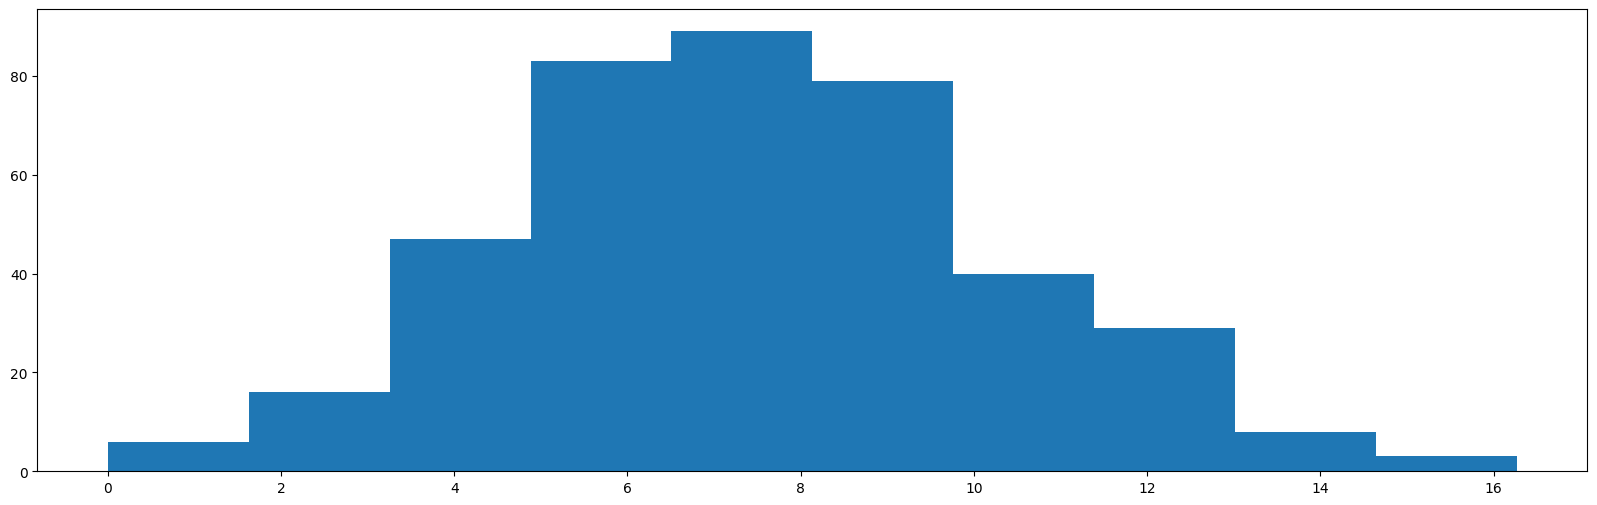

In [17]:
plt.figure(figsize=(20,6))
plt.hist('Sales',data=company_data)
plt.show()


*As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold*

- Since the highest sales is around 16, the middle will be around 8, so we can consider sales below 8 as **'Bad'** and above 8 as **'Good'**.
- Similarly for segregation of 3 categories, we will divide the highest sales by 3 and take the first 1/3rd part (in the left) as **'Low'**, the second 1/3rd part (in the middle) as **'Medium'** and the third 1/3rd (in the right) as **'high'**.

We will proceed with segregation into 3 parts i.e., 'High', 'Medium' and 'Low'.

In [18]:
max_sale = company_data.Sales.max()
max_sale

part_1 = max_sale/3
part_1

part_2 = part_1 * 2 #(as decided it is 2 * 1/3 ~ 2 * part_1)
part_2

part_3 = part_1 * 3 #(as decided it is 3 * 1/3 ~ 2 * part_1)
part_3

print(f"First Part: {part_1} ; Second Part: {part_2} ; Third Part: {part_3}")

First Part: 5.423333333333333 ; Second Part: 10.846666666666666 ; Third Part: 16.27


In [19]:
company_data['Sales_Categorized'] = pd.cut(x = company_data['Sales'], bins = [0,part_1,part_2,16.3], labels=['Low','Medium','High'], right = False)
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Categorized  
0         17   Yes  Yes            Medium  
1         10   Yes  Yes              High  
2         12   Yes  Yes            Medium  
3         14   Yes  Yes            Medium  
4         13   Yes   No               Low

In [20]:
company_data.Sales_Categorized.value_counts()

Sales_Categorized
Medium    247
Low       102
High       51
Name: count, dtype: int64

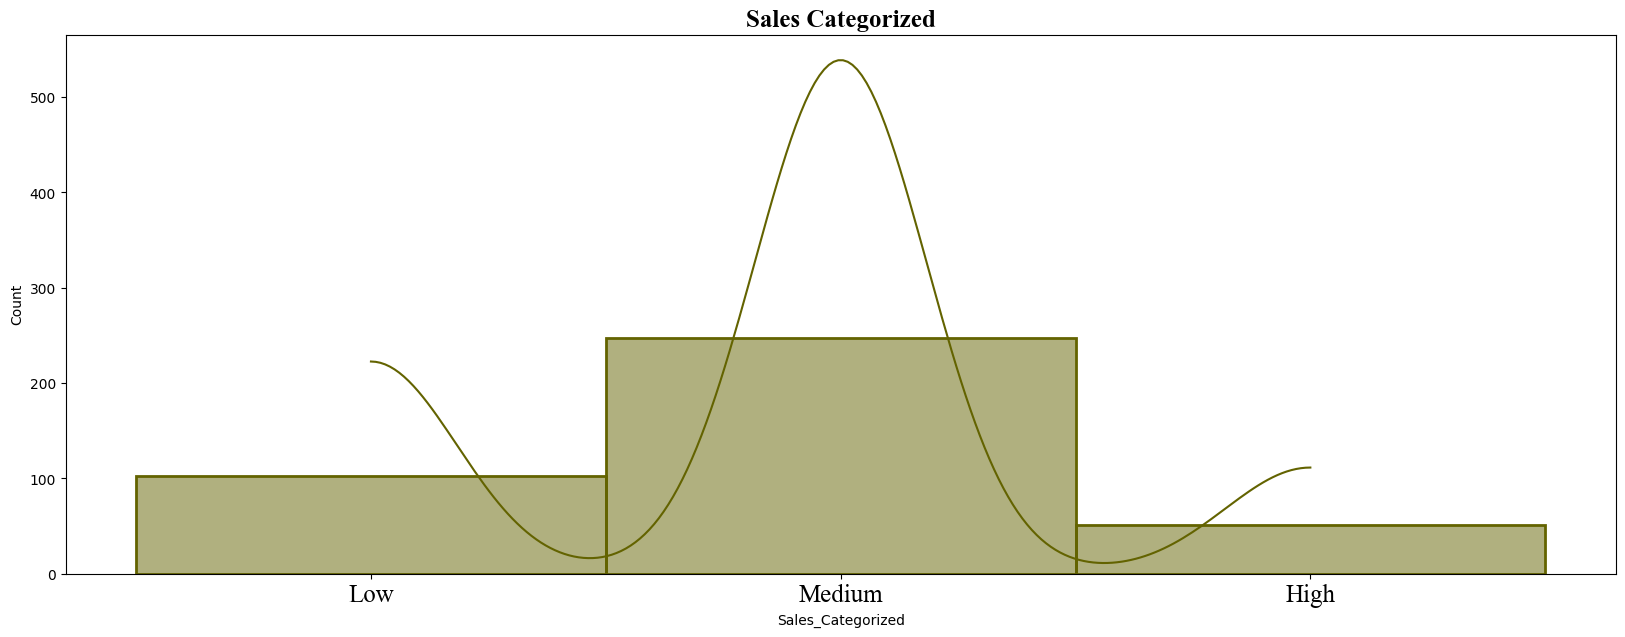

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotting(df, feature, color):
    plt.figure(figsize=(20,7))
    plot = sns.histplot(company_data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '18')
    plt.title('Sales Categorized', weight='bold', fontfamily = "Times New Roman", size = '18')

plotting(company_data,'Sales_Categorized', '#636300')

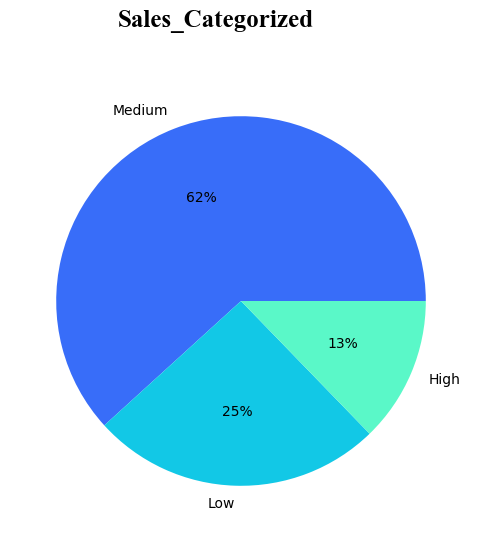

In [22]:
# Display state data in a form of Pie Graph
plt.figure(figsize=(20,6))
values = company_data['Sales_Categorized'].value_counts().keys().tolist()
counts = company_data['Sales_Categorized'].value_counts().tolist()
plt.pie(company_data['Sales_Categorized'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('Sales_Categorized', weight='bold', fontfamily = "Times New Roman", size = '18')

plt.show()

In [23]:
company_data.Sales_Categorized.value_counts()

Sales_Categorized
Medium    247
Low       102
High       51
Name: count, dtype: int64

##### **INFERENCE:** #####
The **Target column is UnBalanced** i.e., 'Sales_Categorized' column is not evenly distributed or balanced with 'Medium' samples being the most i.e., 247 (62%), followed by 'Low' with 102 (25%) and lastly 'High' with 51 (13%)

#### ***Segregating the columns into Numeric and Non-Numeric*** ####

In [24]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sales              400 non-null    float64 
 1   CompPrice          400 non-null    int64   
 2   Income             400 non-null    int64   
 3   Advertising        400 non-null    int64   
 4   Population         400 non-null    int64   
 5   Price              400 non-null    int64   
 6   ShelveLoc          400 non-null    object  
 7   Age                400 non-null    int64   
 8   Education          400 non-null    int64   
 9   Urban              400 non-null    object  
 10  US                 400 non-null    object  
 11  Sales_Categorized  400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [25]:
categorical_cols = []
numeric_cols = []
for columns in company_data.columns:
      if ((company_data[columns].dtypes == 'object') or (company_data[columns].dtypes == 'category')):
            categorical_cols.append(columns)
            print(f"There are {len(company_data[columns].unique())} unique values in the categorical column name '{columns}'")
      elif ((company_data[columns].dtypes != 'object') and (company_data[columns].dtypes != 'category')):
            numeric_cols.append(columns)

print("\nThe categorical columns are: ",categorical_cols,"\n")
print("The numeric columns are: ",numeric_cols,"\n")

There are 3 unique values in the categorical column name 'ShelveLoc'
There are 2 unique values in the categorical column name 'Urban'
There are 2 unique values in the categorical column name 'US'
There are 3 unique values in the categorical column name 'Sales_Categorized'

The categorical columns are:  ['ShelveLoc', 'Urban', 'US', 'Sales_Categorized'] 

The numeric columns are:  ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



In [26]:
# Categorical variables
# For columns in company_data.columns:
# If company_data[columns].dtypes == 'object' or company_data[columns].dtypes == 'category':
for columns in company_data[categorical_cols].columns:
        unique_count = len(company_data[columns].unique())
        print("\n------------------------------------------")
        print(f"There are {unique_count} unique columns in the column name '{columns}'")
        print("\n",company_data[columns].value_counts())


------------------------------------------
There are 3 unique columns in the column name 'ShelveLoc'

 ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

------------------------------------------
There are 2 unique columns in the column name 'Urban'

 Urban
Yes    282
No     118
Name: count, dtype: int64

------------------------------------------
There are 2 unique columns in the column name 'US'

 US
Yes    258
No     142
Name: count, dtype: int64

------------------------------------------
There are 3 unique columns in the column name 'Sales_Categorized'

 Sales_Categorized
Medium    247
Low       102
High       51
Name: count, dtype: int64


In [27]:
company_data[numeric_cols].head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education
0   9.50        138      73           11         276    120   42         17
1  11.22        111      48           16         260     83   65         10
2  10.06        113      35           10         269     80   59         12
3   7.40        117     100            4         466     97   55         14
4   4.15        141      64            3         340    128   38         13

In [28]:
company_data[categorical_cols].head()

ShelveLoc Urban   US Sales_Categorized
0       Bad   Yes  Yes            Medium
1      Good   Yes  Yes              High
2    Medium   Yes  Yes            Medium
3    Medium   Yes  Yes            Medium
4       Bad   Yes   No               Low

In [29]:
# Creating dataframes for both categorical data as well as numeric data
cat_comp_data = pd.DataFrame()
num_comp_data = pd.DataFrame()

cat_comp_data = company_data[categorical_cols]
num_comp_data = company_data[numeric_cols]

In [30]:
num_comp_data.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education
0   9.50        138      73           11         276    120   42         17
1  11.22        111      48           16         260     83   65         10
2  10.06        113      35           10         269     80   59         12
3   7.40        117     100            4         466     97   55         14
4   4.15        141      64            3         340    128   38         13

In [31]:
cat_comp_data.head()

ShelveLoc Urban   US Sales_Categorized
0       Bad   Yes  Yes            Medium
1      Good   Yes  Yes              High
2    Medium   Yes  Yes            Medium
3    Medium   Yes  Yes            Medium
4       Bad   Yes   No               Low

### **Visualizations** ###

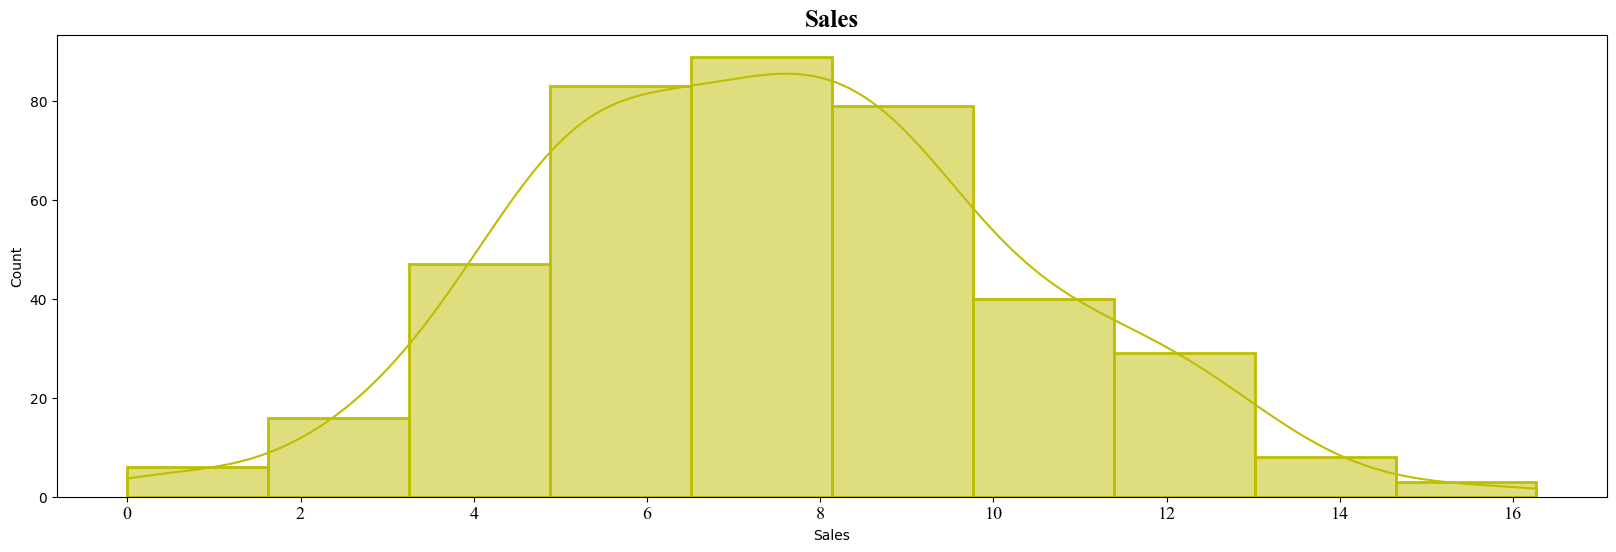

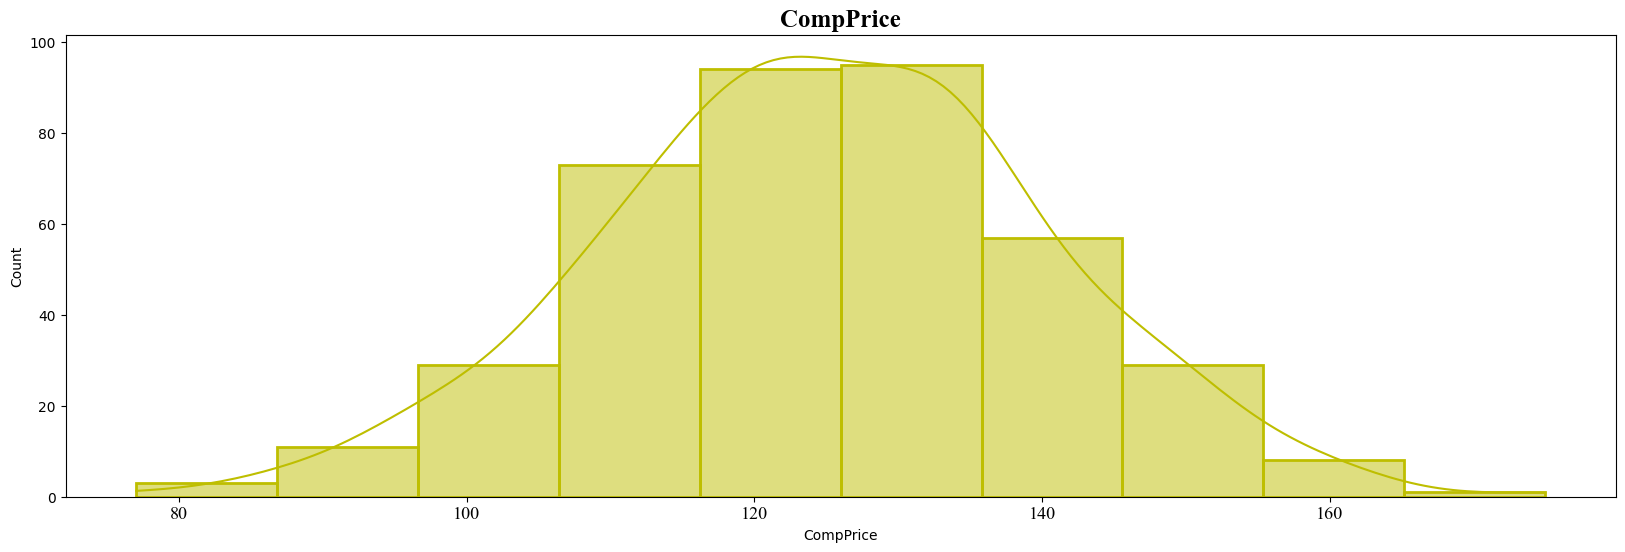

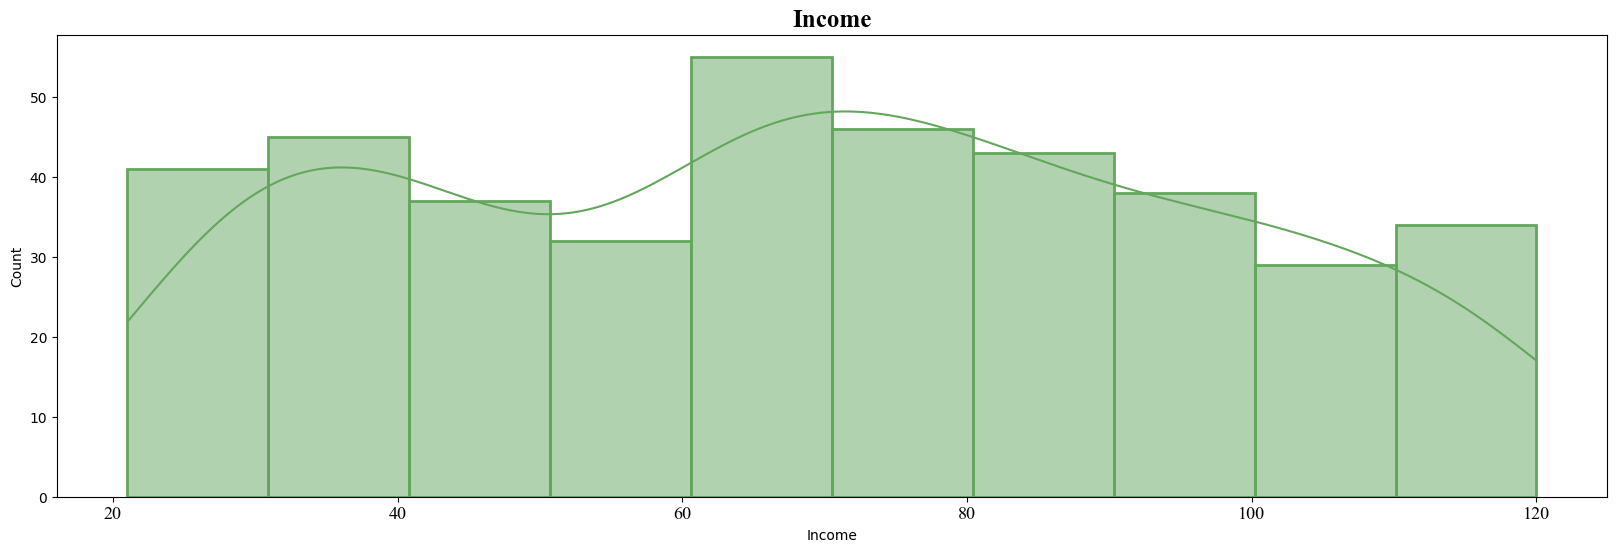

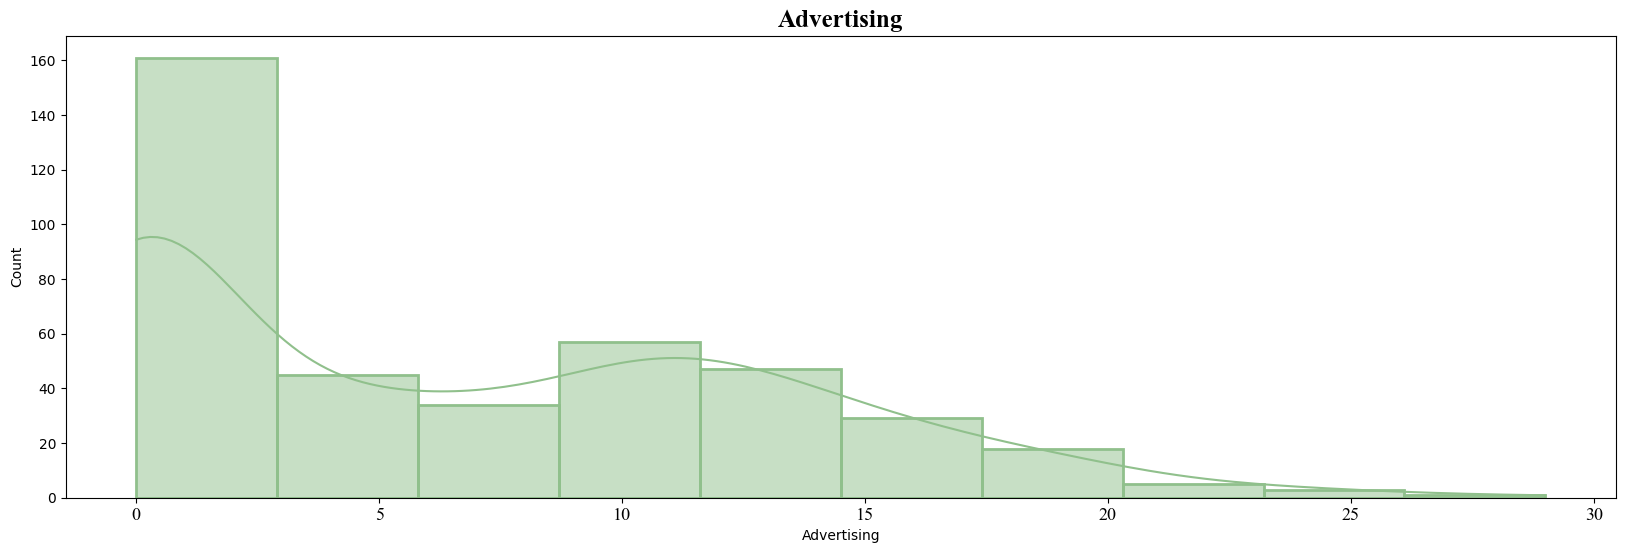

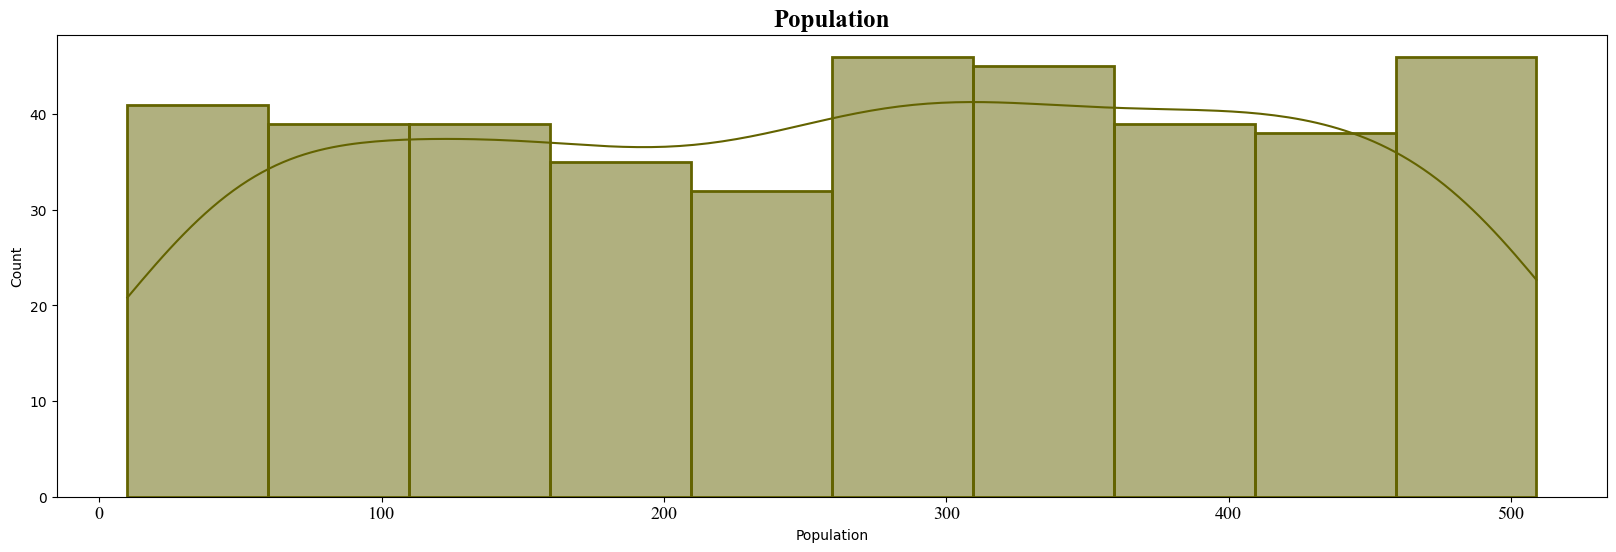

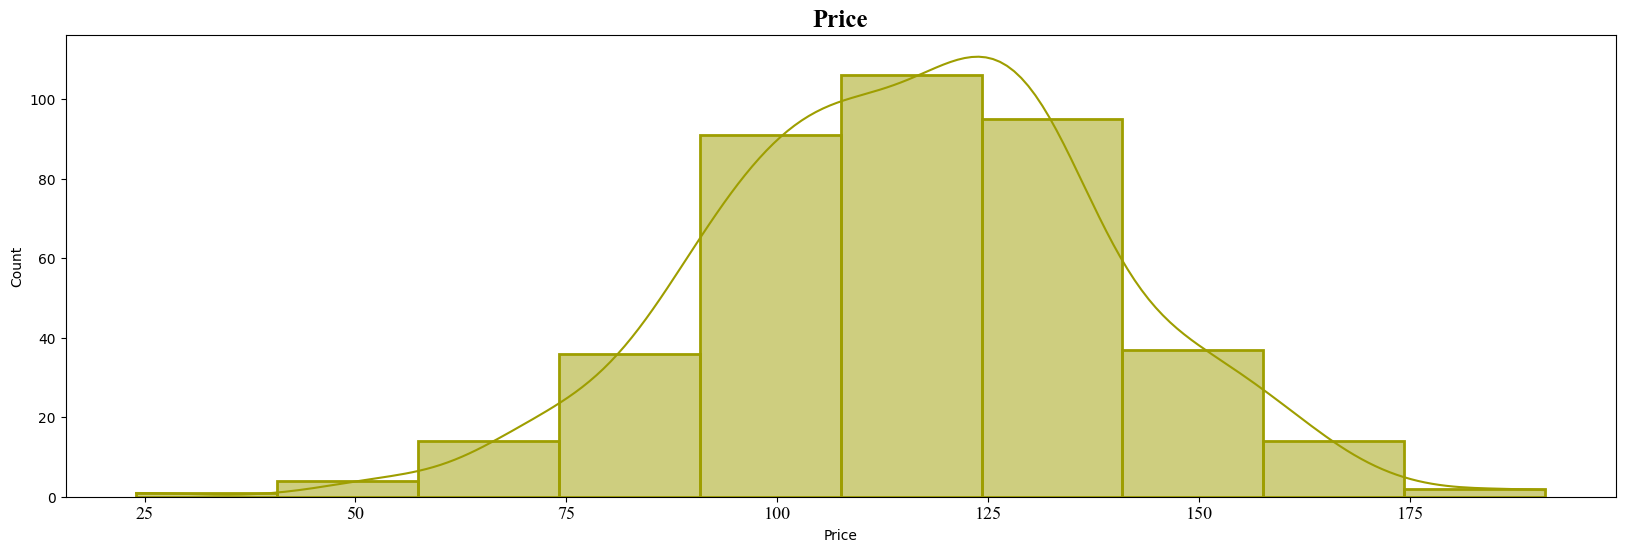

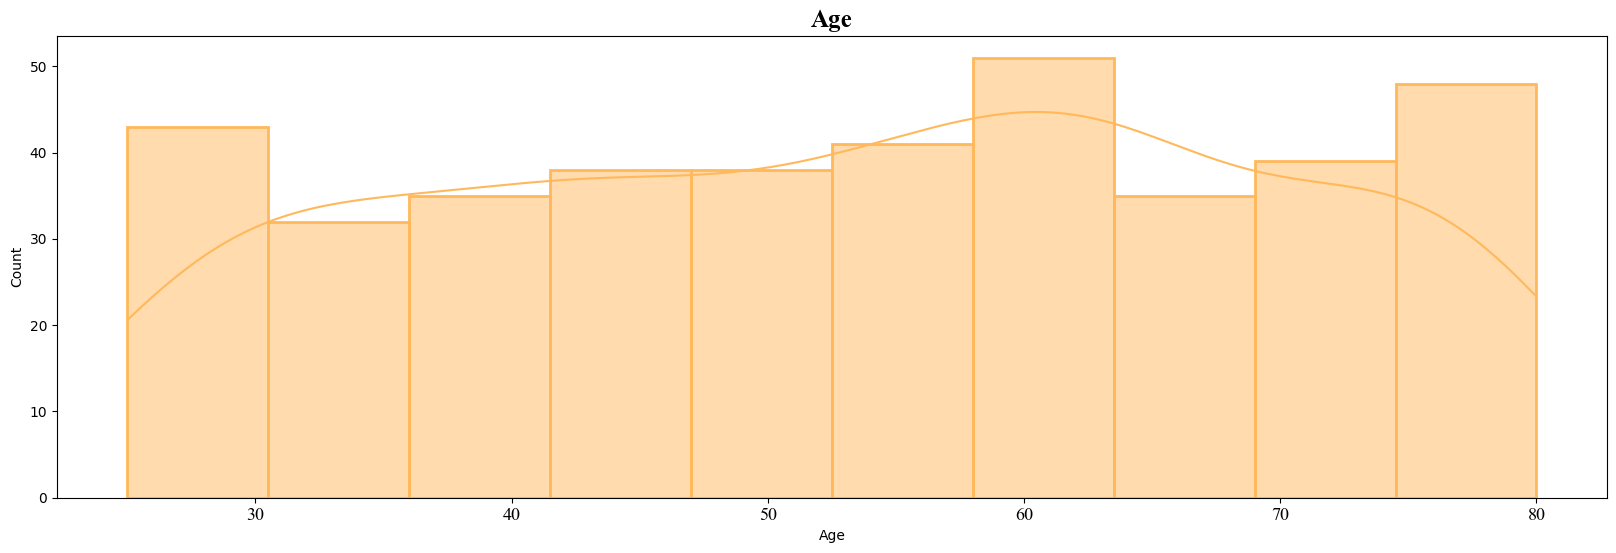

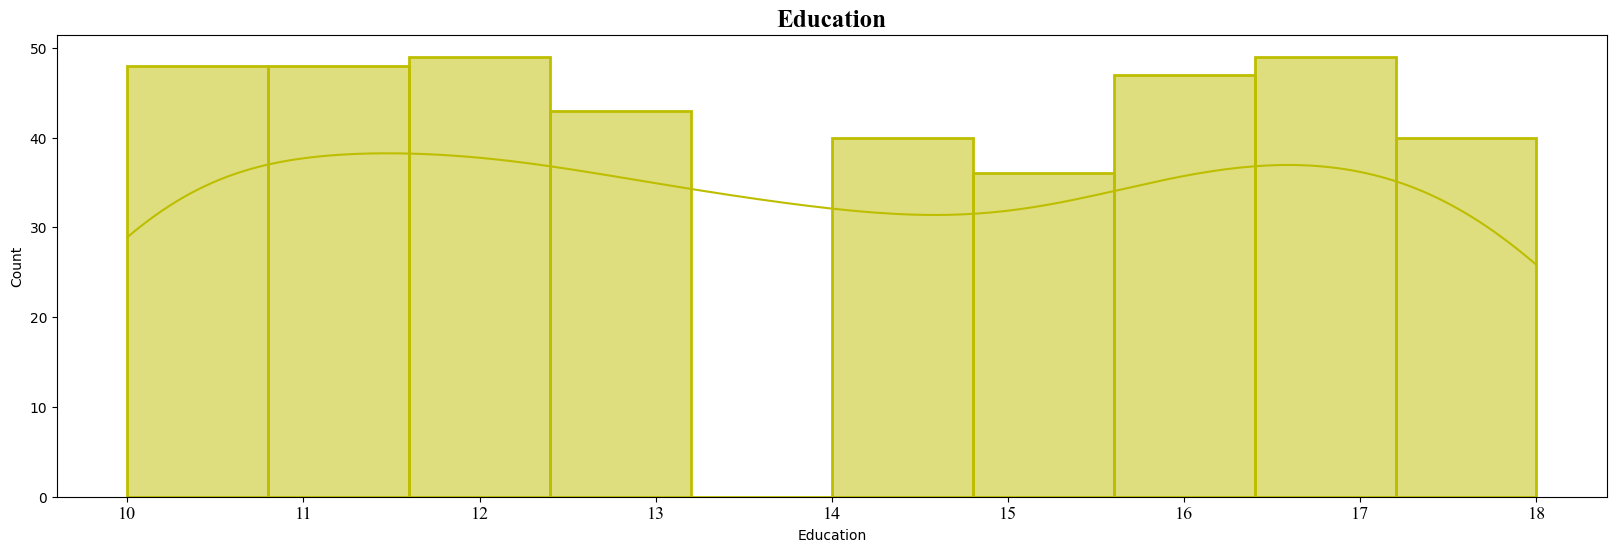

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '13')

for n_cols in num_comp_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(num_comp_data,n_cols)
    plt.title(n_cols, weight='bold', fontfamily = "Times New Roman", size = '18')


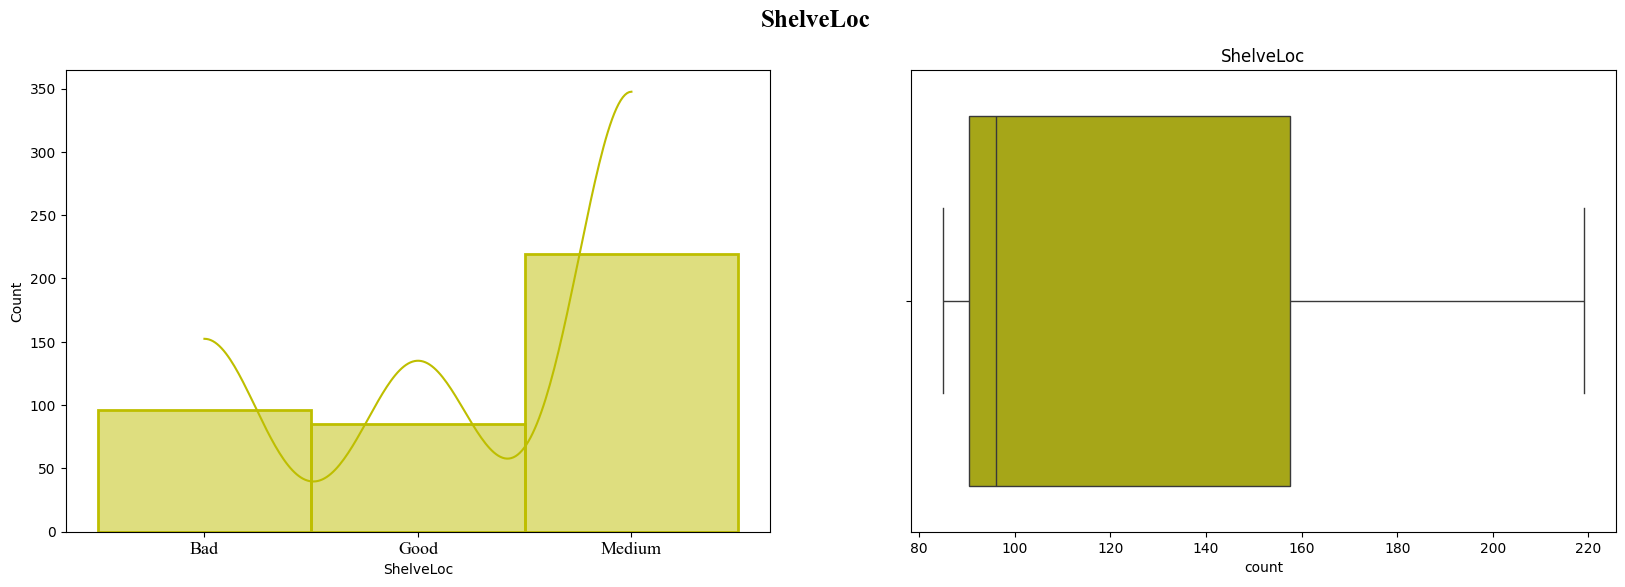

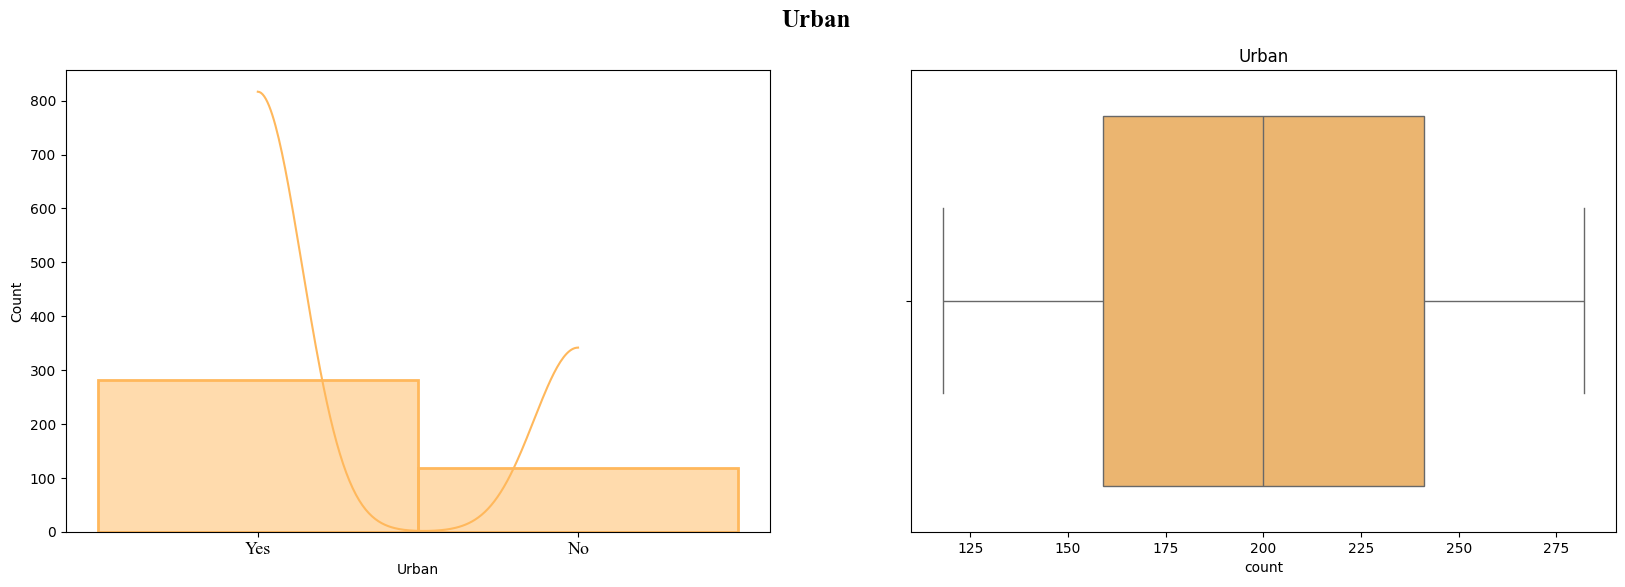

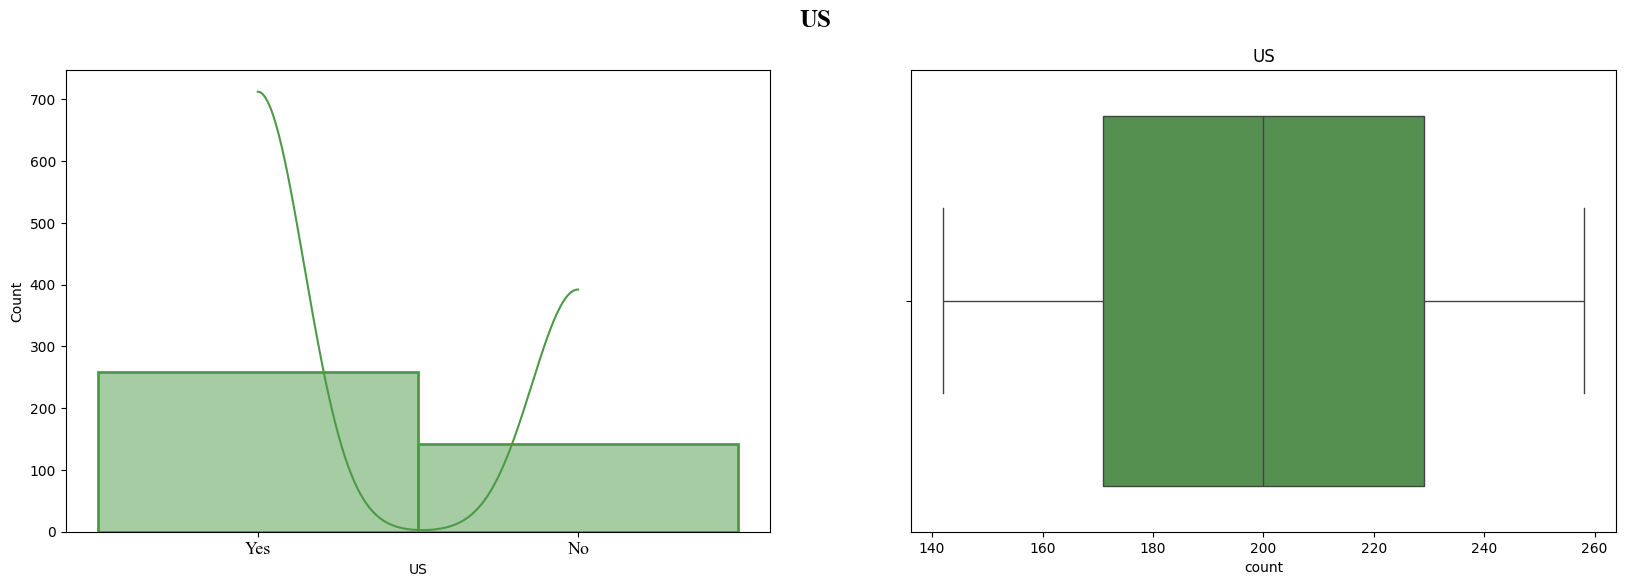

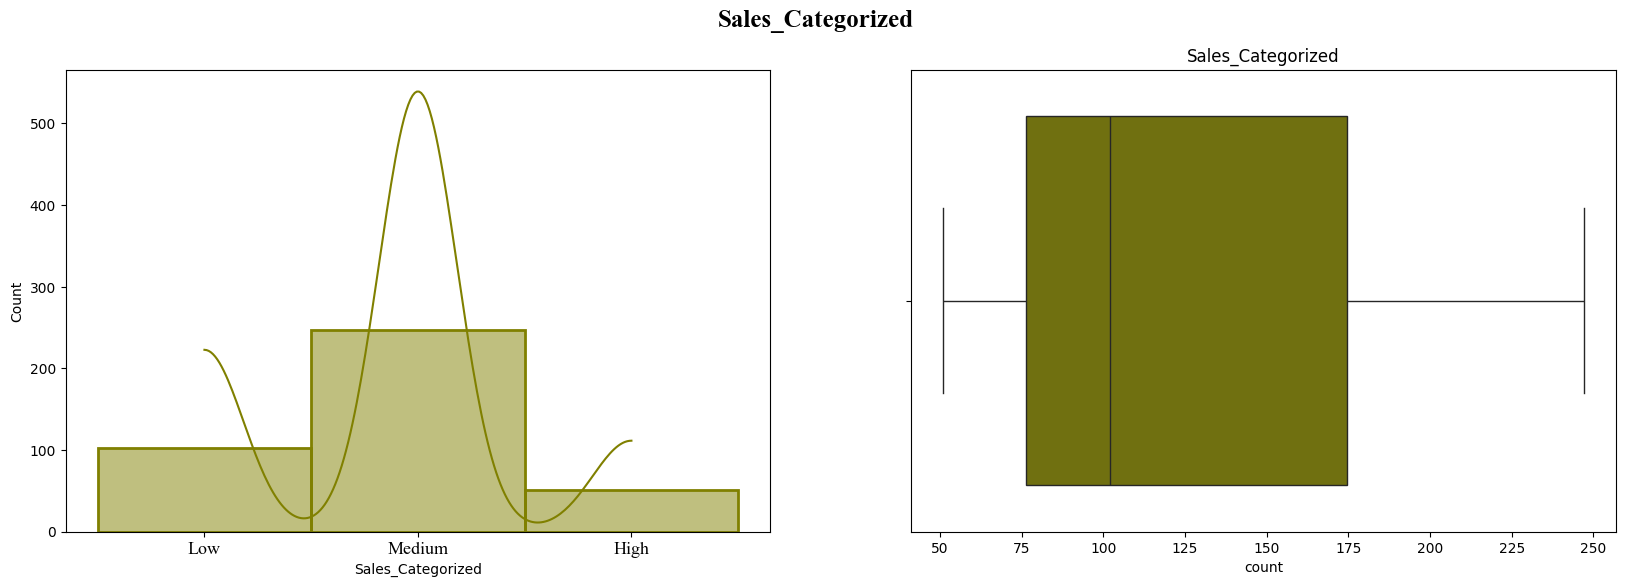

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '13')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.suptitle(feature, weight='bold', fontfamily = "Times New Roman", size = '18')

for c_cols in cat_comp_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(cat_comp_data,c_cols)
    plt.title(c_cols)

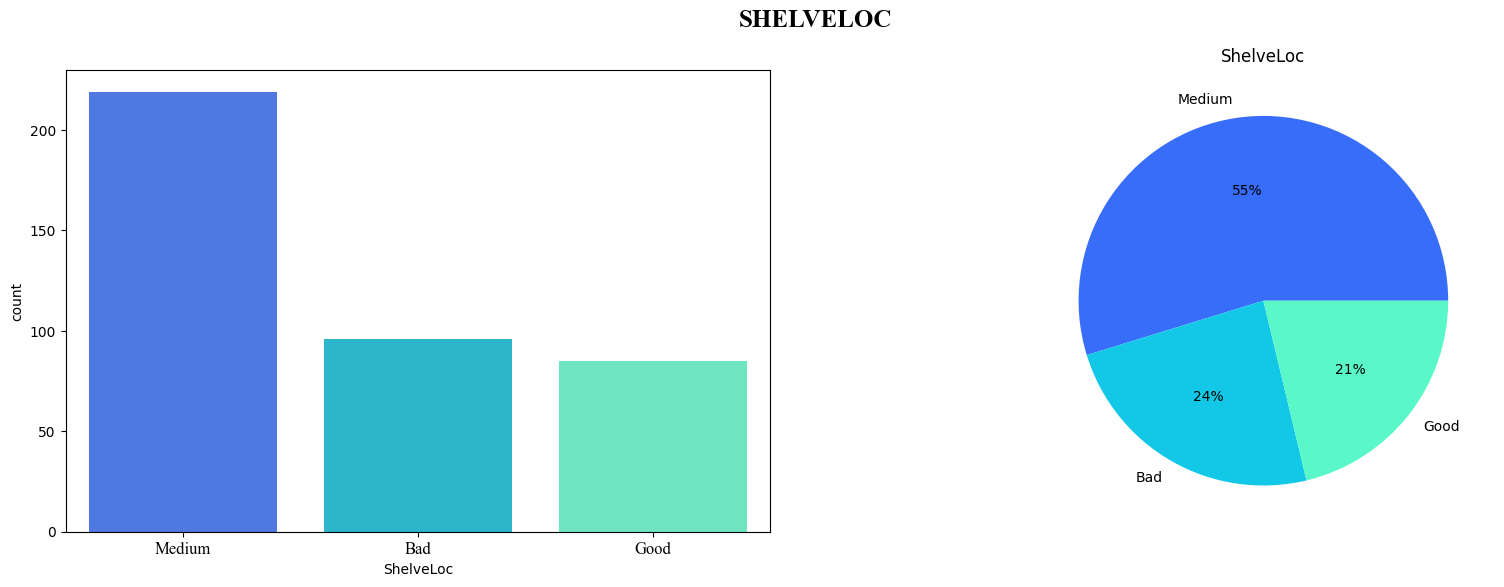

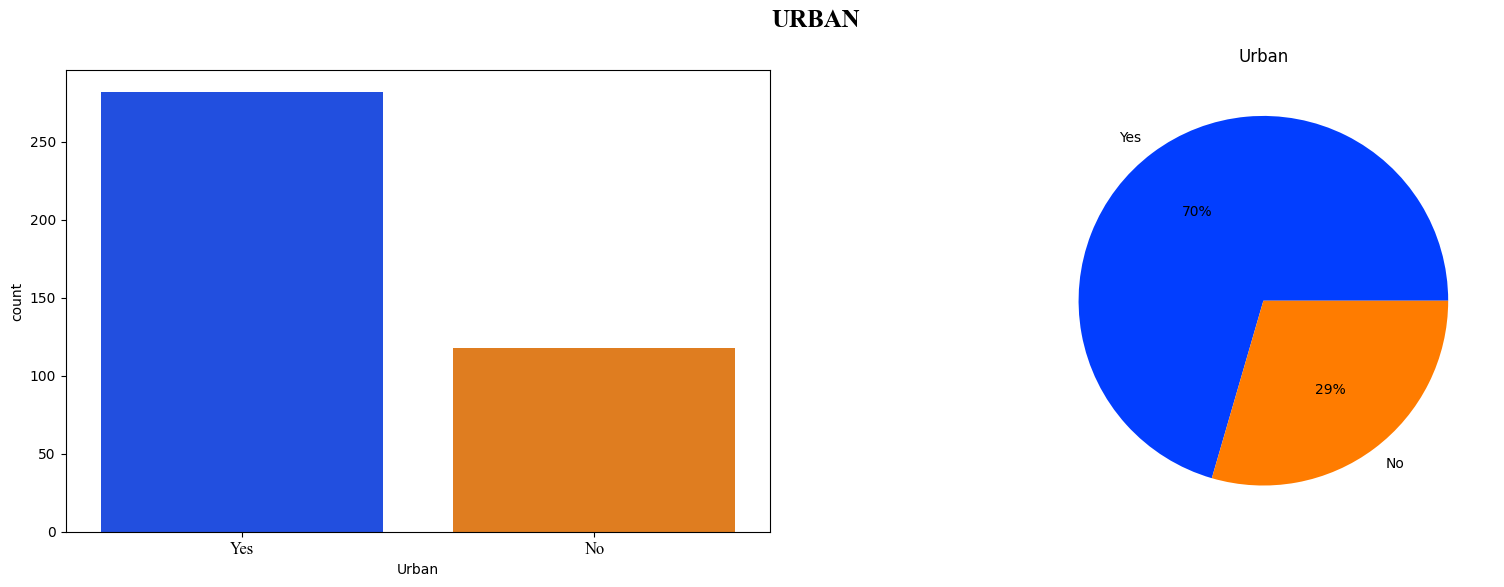

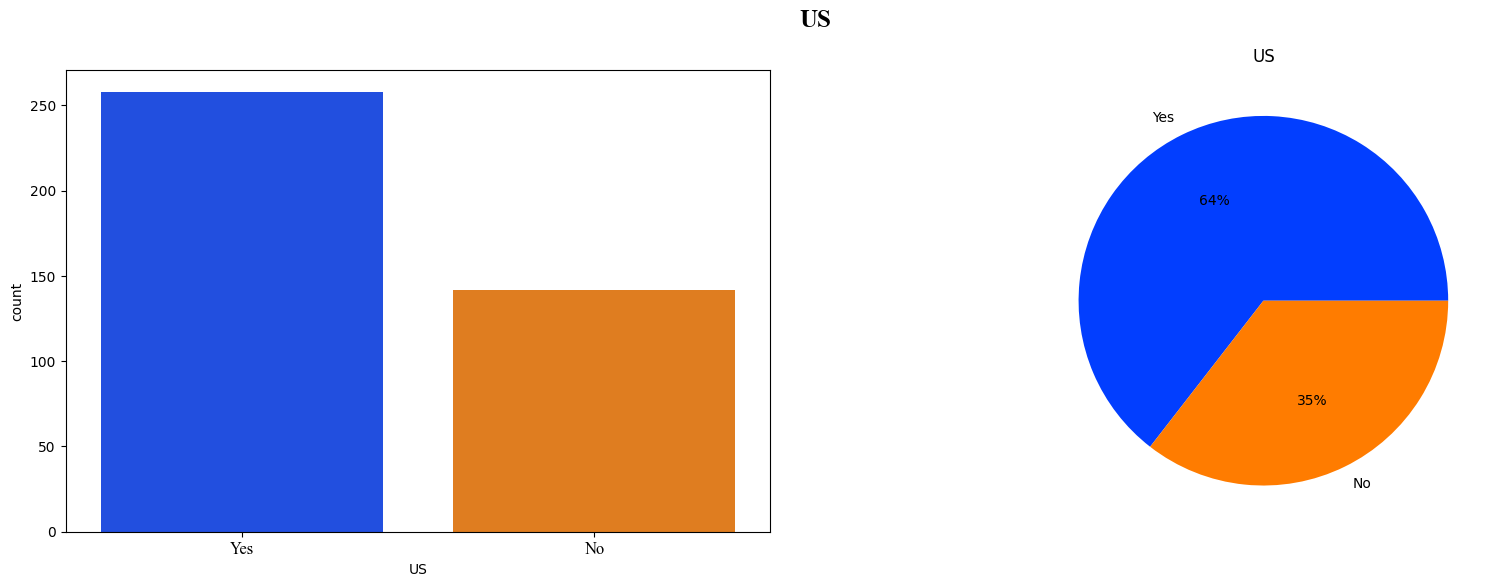

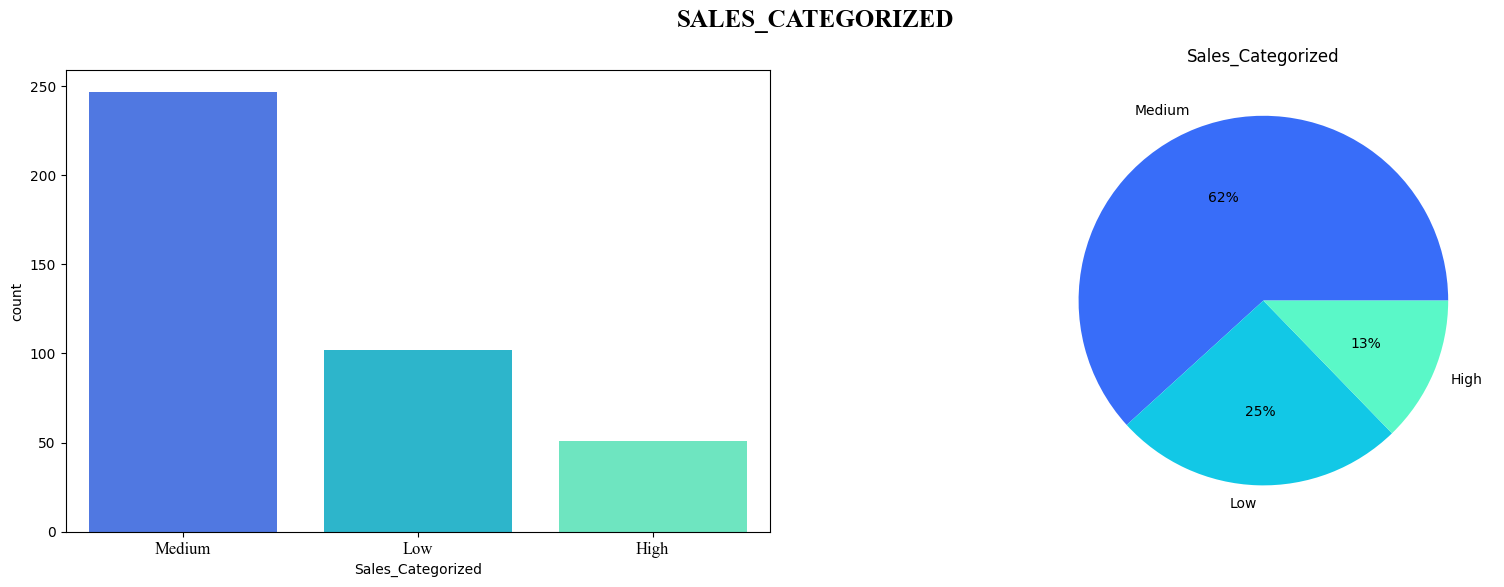

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature,color):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    palette_color = sns.color_palette(color)
    sns.countplot(x=feature, data=data, palette = palette_color, order=data[feature].value_counts().index)
    plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")

  
    # Display state data in a form of Pie Graph
    plt.subplot(1,2,2)
    values = data[feature].value_counts().keys().tolist()
    counts = data[feature].value_counts().tolist()
    plt.pie(data[feature].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman").set_fontsize('18')

for c_cols in cat_comp_data:
    colors = ['bright','rainbow']
    color = random.choice(colors)
    plot_data(cat_comp_data,c_cols,color)
    plt.title(c_cols)

### **Label Encoding** ###

In [35]:
comp_data = company_data.copy()

In [36]:
comp_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Categorized  
0         17   Yes  Yes            Medium  
1         10   Yes  Yes              High  
2         12   Yes  Yes            Medium  
3         14   Yes  Yes            Medium  
4         13   Yes   No               Low

In [37]:
cat_comp_data.head()

ShelveLoc Urban   US Sales_Categorized
0       Bad   Yes  Yes            Medium
1      Good   Yes  Yes              High
2    Medium   Yes  Yes            Medium
3    Medium   Yes  Yes            Medium
4       Bad   Yes   No               Low

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in cat_comp_data:
  comp_data[str(col) + "_n"]= label_encoder.fit_transform(comp_data[col])

In [39]:
# Changing the number of rows to be displayed in a DataFrame
#pd.set_option('display.max_rows', 10)  # Display up to 10 rows
#pd.set_option('display.max_rows', None)  # Show all rows

##### *The Column data for the Categorical columns is decoded by LabelEncoder in the following way:* #####
| **Column Name** | **1st Category** | **2nd Category** | **3rd Category** |
| --- | --- | --- | --- |
| **ShelveLoc_n** | 0 - Bad | 1 - Good | 2 - Medium |
| **Urban_n** | 0 - No | 1 - Yes | |  
| **US_n** | 0 - No | 1 - Yes | |
| **Sales_Categorized_n** | 0 - High | 1 - Low |2 - Medium | 

In [40]:
comp_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Categorized  ShelveLoc_n  Urban_n  US_n  \
0         17   Yes  Yes            Medium            0        1     1   
1         10   Yes  Yes              High            1        1     1   
2         12   Yes  Yes            Medium            2        1     1   
3         14   Yes  Yes            Medium            2        1     1   
4         13   Yes   No               Low            0        1     0   

   Sales_Categorized_n  
0                    2  
1                    0  
2                    2  
3                    2  
4                    1

In [41]:
# Removing the Categorical Columns once we have desciphered the encoding done by LabelEncoder
comp_data = comp_data.drop(['Sales', 'ShelveLoc','Urban', 'US', 'Sales_Categorized'], axis = 'columns')
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

In [42]:
# After decoded the data we can now only consider the label encoded columns and not the categorical columns and also exclude the target column 'Sales_Categorized_n'
inputs_comp = comp_data.drop(['Sales_Categorized_n'], axis = 'columns')
inputs_comp

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  
0              0        1     1  
1              1        1     1  
2              2        1     1  
3              2        1     1  
4              0        1     0  
..           ...      ...   ...  
395            1        1     1  
396            2        0     1  
397            2        1     1  
398            0        1     1  
399            1        1     1  

[400 rows x 10 columns]

In [43]:
target_comp = comp_data['Sales_Categorized_n']
target_comp.head()

0    2
1    0
2    2
3    2
4    1
Name: Sales_Categorized_n, dtype: int32

In [44]:
comp_data2 = pd.concat([comp_data, company_data['Sales']], axis=1, join='inner')

### **Correlation Matrix** ###
Check for Assumption: Independent variables are independent of each other

In [45]:
comp_data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0            0        1     1                    2  
1            1        1     1                    0  
2            2        1     1                    2  
3            2        1     1                    2  
4            0        1     0                    1

In [46]:
comp_data.corr()

CompPrice    Income  Advertising  Population     Price  \
CompPrice             1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income               -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising          -0.024199  0.058995     1.000000    0.265652  0.044537   
Population           -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price                 0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age                  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education             0.025197 -0.056855    -0.033594   -0.106378  0.011747   
ShelveLoc_n           0.023350 -0.067678     0.008544   -0.044772  0.014633   
Urban_n               0.066594  0.037967     0.042035   -0.052025  0.047016   
US_n                  0.016869  0.089601     0.684460    0.060564  0.057861   
Sales_Categorized_n  -0.011509 -0.039131     0.000816    0.025202  0.088405   

                          Age  Education  ShelveLoc_n   Urban_n      US_n  \
CompPrice           -0.100239   0.025197     0.023350  0.066594  0.016869   
Income              -0.004670  -0.056855    -0.067678  0.037967  0.089601   
Advertising         -0.004557  -0.033594     0.008544  0.042035  0.684460   
Population          -0.042663  -0.106378    -0.044772 -0.052025  0.060564   
Price               -0.102177   0.011747     0.014633  0.047016  0.057861   
Age                  1.000000   0.006488     0.056488  0.028479  0.008652   
Education            0.006488   1.000000     0.001492 -0.033094 -0.078250   
ShelveLoc_n          0.056488   0.001492     1.000000 -0.063978 -0.039760   
Urban_n              0.028479  -0.033094    -0.063978  1.000000  0.047085   
US_n                 0.008652  -0.078250    -0.039760  0.047085  1.000000   
Sales_Categorized_n  0.002346   0.030381     0.214414 -0.032248 -0.047204   

                     Sales_Categorized_n  
CompPrice                      -0.011509  
Income                         -0.039131  
Advertising                     0.000816  
Population                      0.025202  
Price                           0.088405  
Age                             0.002346  
Education                       0.030381  
ShelveLoc_n                     0.214414  
Urban_n                        -0.032248  
US_n                           -0.047204  
Sales_Categorized_n             1.000000

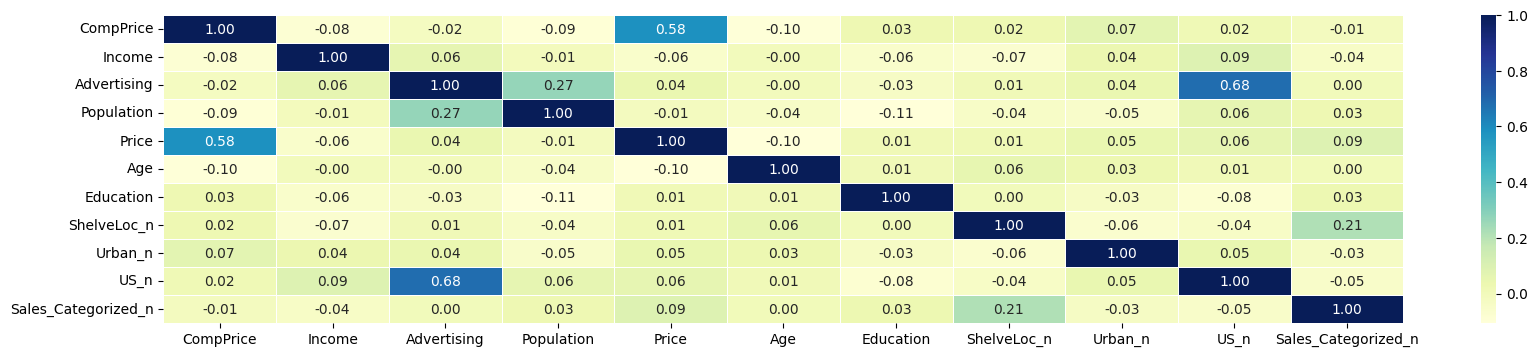

In [47]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(comp_data.corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="YlGnBu",ax=ax)
plt.show()

#### **Positive Correlation:** ####
- We see a positive correlation between US_n and Advertizing
- We see a positive correlation between Price and CompPrice
- We see a positive correlation between Population and Advertizing

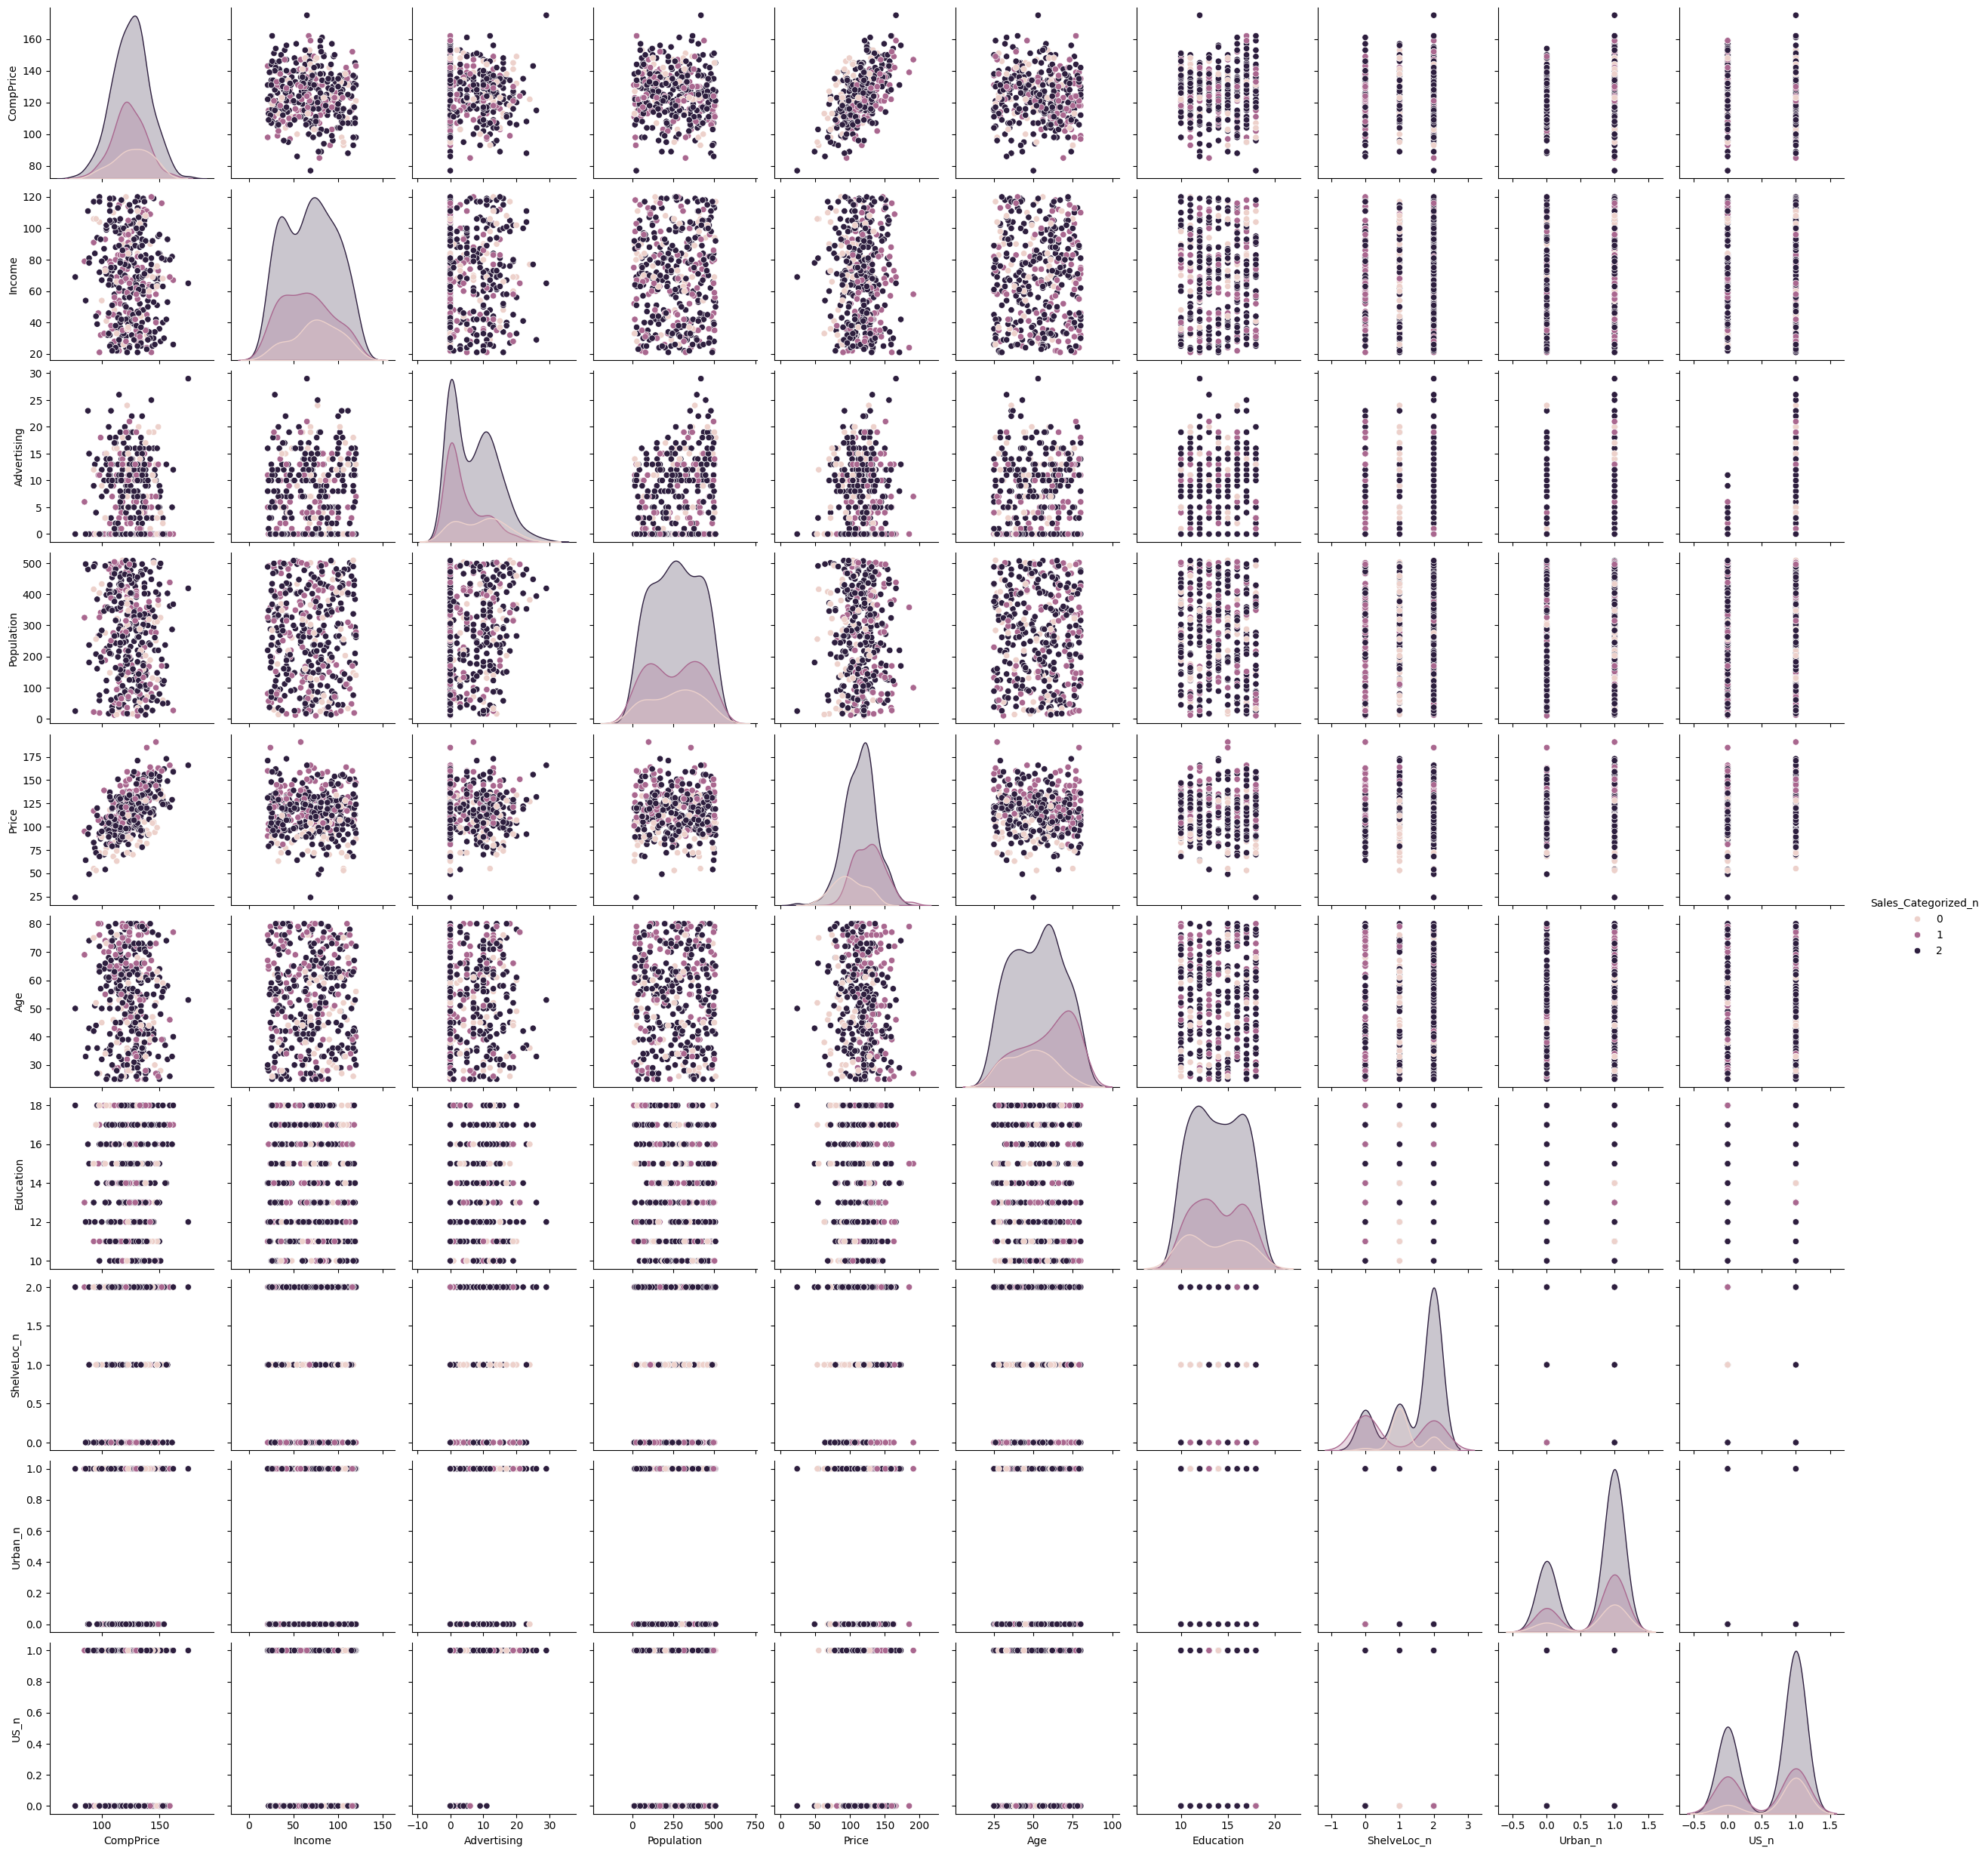

In [48]:
# Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.pairplot(comp_data, hue='Sales_Categorized_n')

Text(0.5, 1.0, "Correlation with 'Tax Categories'\n")

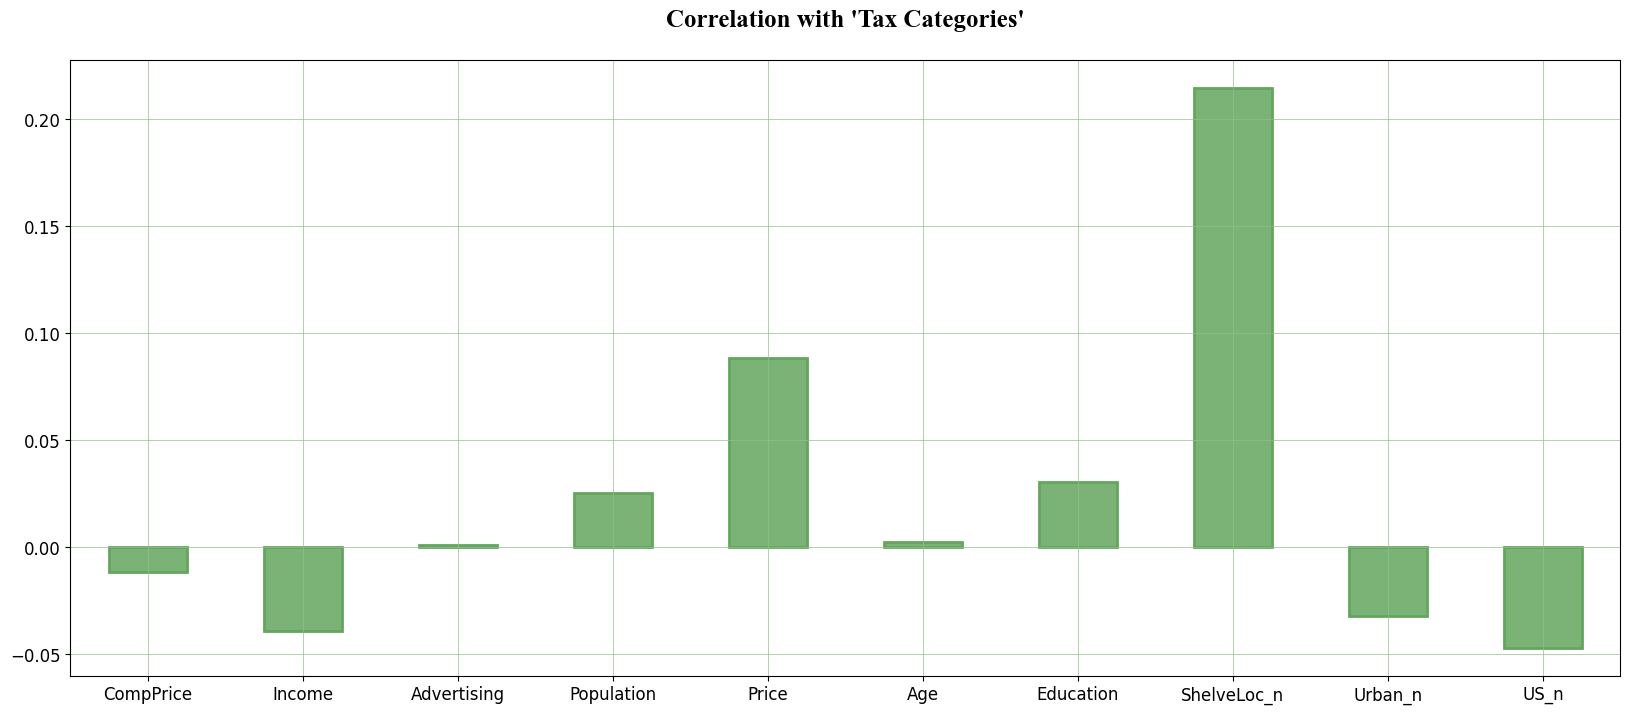

In [49]:
# Correlation with 'Tax Categories'

correlations = comp_data.corrwith(comp_data['Sales_Categorized_n'])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (20, 8), fontsize = 12, color = '#7ab375', edgecolor = '#64a65e', linewidth = 2, grid = True)
plt.grid(color='#90c08c', linestyle='-', linewidth=0.5)
plt.xticks(rotation = 0,fontsize = 12)
plt.title("Correlation with 'Tax Categories'\n", fontweight="bold", horizontalalignment="center", fontstyle = "normal", fontsize = "18", fontfamily = "Times New Roman")

## **Feature Selection Technique after evaluation of scores** ##

In [50]:
# split into input (X) and output (y) variables
fs_comp_x = comp_data.iloc[:, :-1]
fs_comp_y=  comp_data.Sales_Categorized_n

In [51]:
# Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [52]:
# Feature extraction
test_comp_feat = SelectKBest(score_func=chi2, k=4)
fit_comp_feat = test_comp_feat.fit(fs_comp_x, fs_comp_y)

In [53]:
# summarize scores
scores_comp_feat = fit_comp_feat.scores_
features_comp = fit_comp_feat.transform(fs_comp_x)

In [54]:
score_comp_feat_df = pd.DataFrame(list(zip(scores_comp_feat, fs_comp_x.columns)), columns =['Score', 'Feature'])
score_comp_feat_df.sort_values(by="Score", ascending=False, inplace=True)
score_comp_feat_df

Score      Feature
4  252.311197        Price
2  134.627835  Advertising
5   92.047690          Age
1   54.364054       Income
3   23.495660   Population
7   18.387028  ShelveLoc_n
9    3.471631         US_n
0    2.738224    CompPrice
6    0.313667    Education
8    0.142602      Urban_n

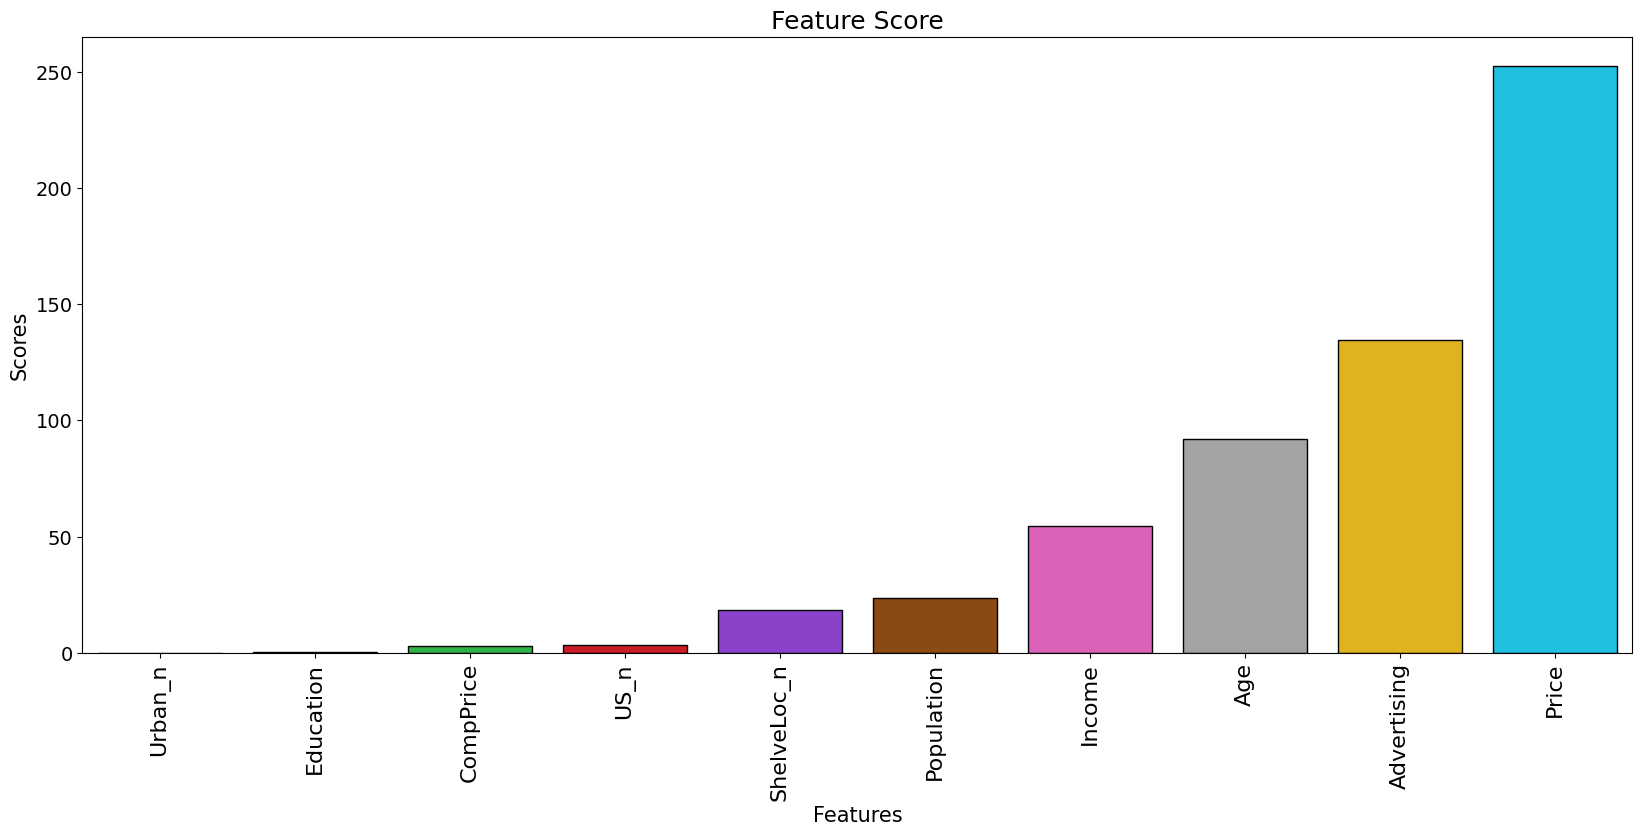

In [55]:
# Creating a chart with the Feature Score

plt.figure(figsize=(20,8))
# make barplot and sort bars
palette_color = sns.color_palette('bright')
sns.barplot(x='Feature', y="Score", data=score_comp_feat_df, order=score_comp_feat_df.sort_values('Score').Feature, palette=palette_color, edgecolor="#000000", linewidth=1,)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score", size=18)
plt.show()

## **RANDOM FOREST** ##

In [56]:
target_comp.value_counts()

Sales_Categorized_n
2    247
1    102
0     51
Name: count, dtype: int64

We can see that the data as target value is imbalanced with the class "2: Medium" being the most with 247, followed by the class "1: Low" and lastly the class "0: High".

## **Imbalanced Data** ##

### ***Using GridSearchCV for tuding the Random Forest Based on the Best Parameters*** ###

In [57]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1, n_jobs=1, max_depth=5,n_estimators=100, oob_score=True)

classifier_rf.fit(inputs_comp, target_comp)

# Checking the out-of-bag (OOB) score
print(f'Checking the out-of-bag (OOB) score {classifier_rf.oob_score_}')

rf = RandomForestClassifier(random_state=1, n_jobs=1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [5,10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=1, verbose=1, scoring="accuracy")

grid_search.fit(inputs_comp, target_comp)

print('Best Score',grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

Checking the out-of-bag (OOB) score 0.68
Fitting 4 folds for each of 210 candidates, totalling 840 fits
Best Score 0.72
RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=1, random_state=1)


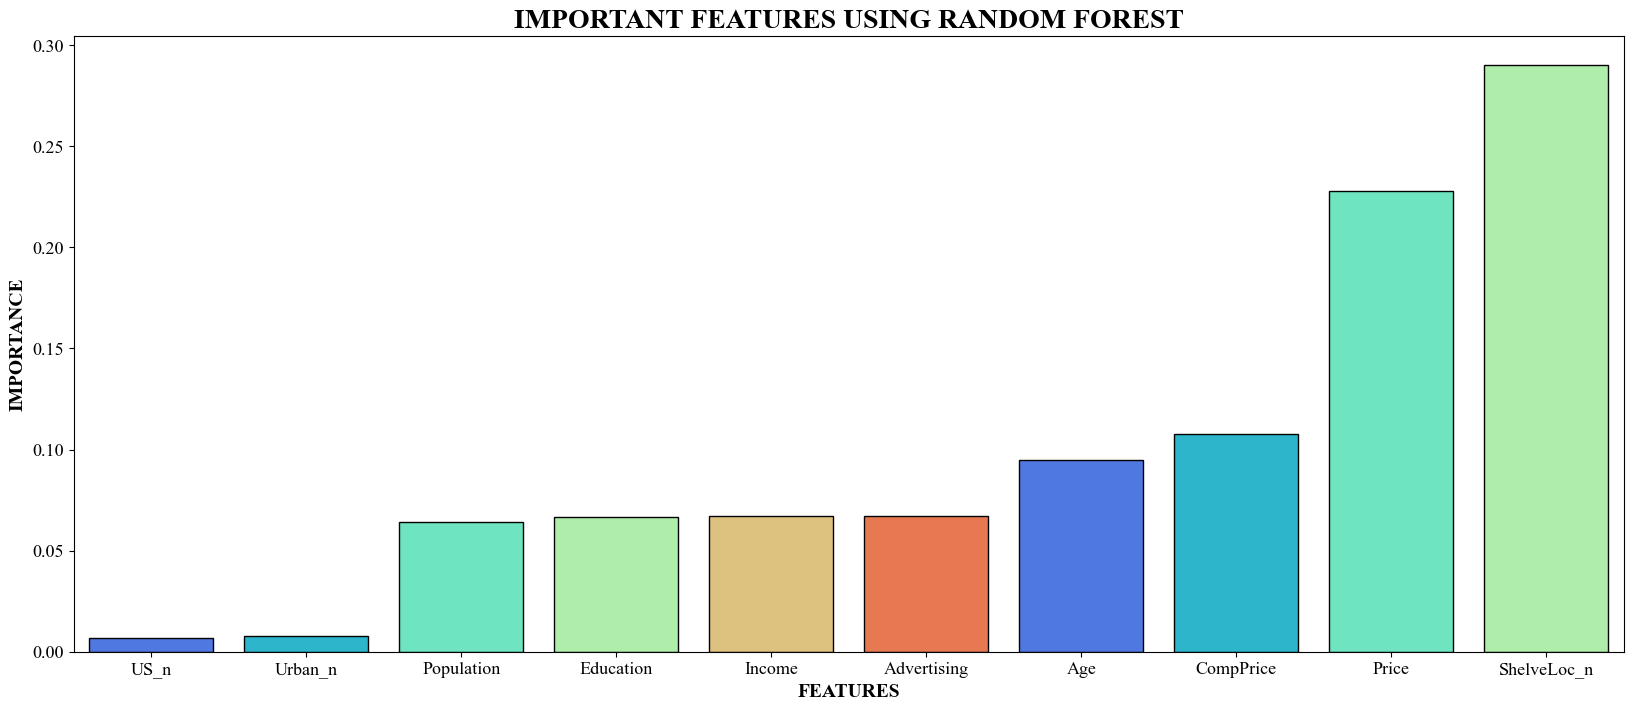

In [58]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Feature": inputs_comp.columns,
    "Importance": rf_best.feature_importances_
})

plt.figure(figsize=(20,8))
# Creating a Bar Plot of the important features sorted
palette_color = sns.color_palette('rainbow')
sns.barplot(x='Feature', y="Importance", data=imp_df, order=imp_df.sort_values('Importance').Feature, palette=palette_color, edgecolor="#000000", linewidth=1,)
plt.xlabel("FEATURES", size=14, weight='bold', fontfamily = "Times New Roman")
plt.ylabel("IMPORTANCE", size=14, weight='bold', fontfamily = "Times New Roman")
plt.yticks(size=13, fontfamily = "Times New Roman")
plt.xticks(size=13, fontfamily = "Times New Roman")
plt.title("IMPORTANT FEATURES USING RANDOM FOREST", weight='bold', fontfamily = "Times New Roman", size=20)
plt.show()

##### **INFERENCE** #####
We see a difference in the columns/features considered as important by Random Forest when compared to the feature scores identified earlier.

In [59]:
imp_df

Feature  Importance
0    CompPrice    0.107602
1       Income    0.066932
2  Advertising    0.067372
3   Population    0.064337
4        Price    0.227675
5          Age    0.094830
6    Education    0.066481
7  ShelveLoc_n    0.290151
8      Urban_n    0.007647
9         US_n    0.006973

In [60]:
imp_df.Importance.sort_values(ascending = False)

# Urban_n and US_n have the least importance and can be ignored.

7    0.290151
4    0.227675
0    0.107602
5    0.094830
2    0.067372
1    0.066932
6    0.066481
3    0.064337
8    0.007647
9    0.006973
Name: Importance, dtype: float64

### ***Categorizing the imbalanced data to Training and Testing Sets with testing sample size as 30%*** ###

In [61]:
# Splitting x and y into training and testing sets, testing sample size being 30%

from sklearn.model_selection import train_test_split
x_train_comp, x_test_comp, y_train_comp, y_test_comp = train_test_split(inputs_comp, target_comp, test_size=0.3)

In [62]:
inputs_comp

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  
0              0        1     1  
1              1        1     1  
2              2        1     1  
3              2        1     1  
4              0        1     0  
..           ...      ...   ...  
395            1        1     1  
396            2        0     1  
397            2        1     1  
398            0        1     1  
399            1        1     1  

[400 rows x 10 columns]

In [63]:
target_comp

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_Categorized_n, Length: 400, dtype: int32

In [64]:
print("Shape of x_train_comp: ",x_train_comp.shape)
print("Shape of x_test_comp: ", x_test_comp.shape)
print("Shape of y_train_comp: ",y_train_comp.shape)
print("Shape of y_test_comp: ",y_test_comp.shape)

Shape of x_train_comp:  (280, 10)
Shape of x_test_comp:  (120, 10)
Shape of y_train_comp:  (280,)
Shape of y_test_comp:  (120,)


In [65]:
# Summarizing train and test composition
counter_train = Counter(y_train_comp)
counter_test = Counter(y_test_comp)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 169, 1: 74, 0: 37}) Testing Data Counter({2: 78, 1: 28, 0: 14})


### ***Function to get all the details for Accuracy, Classification Report and Confustion Matrix*** ###

In [66]:
# Function to get all the metrics like Accuracy Score, ROC_AUC, Classification Report and Confusion Matrix
# based on the classification model, train and test x and y values
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        classify_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TRAINING RESULT\n**********************************************************\n")
        print(f"ACCURACY: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"ROC_AUC: {metrics.roc_auc_score(y_train, clf.predict_proba(x_train), multi_class='ovr') * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        classify_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TESTING RESULT\n**********************************************************\n")        
        print(f"ACCURACY: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"ROC_AUC: {metrics.roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr') * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")

### **Training the Decision Tree Model with default parameters for Criteria and Max Depth** ###

In [67]:
# Preparing a Decision Trees model on training data set
from sklearn.tree import DecisionTreeClassifier
comp_model = DecisionTreeClassifier()
comp_model.fit(x_train_comp, y_train_comp)

# Preparing a Random Forest model on training data set
from sklearn.ensemble import RandomForestClassifier
comp_rf_model = RandomForestClassifier() # Here we are taking the default i.e. 100 trees
comp_rf_model.fit(x_train_comp, y_train_comp)
print_score(comp_model, x_train_comp, y_train_comp, x_test_comp, y_test_comp, train=True)
print_score(comp_rf_model, x_train_comp, y_train_comp, x_test_comp, y_test_comp, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 100.00%

____________________________________________________________________

ROC_AUC: 100.00%

____________________________________________________________________

CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    37.0  74.0  169.0       1.0      280.0         280.0

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 37   0   0]
 [  0  74   0]
 [  0   0 169]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 75.00%

_________________

In [68]:
# Preparing a Random Forest model with 20 trees to see what is the difference in the accuracy
from sklearn.ensemble import RandomForestClassifier
comp_rf_model_20 = RandomForestClassifier(n_estimators=20)
comp_rf_model_20.fit(x_train_comp, y_train_comp)
comp_rf_model_20.score(x_test_comp, y_test_comp)
# The accuracy has reduced with 20 trees

0.7333333333333333

##### **INFERENCE** #####
The accuracy is considerably good with 100 trees i.e. the default option and reduced with 70% with 20 trees.

In [69]:
# Applying the best score derived by the GridSearchCV used earlier
# Best Score - RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=5, n_jobs=1, random_state=1)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

comp_rf_model1 = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10, n_jobs=1, random_state=1)
comp_rf_model1.fit(inputs_comp, target_comp)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=1, random_state=1)

In [70]:
print_score(comp_rf_model1, x_train_comp, y_train_comp, x_test_comp, y_test_comp, train=True)
print_score(comp_rf_model1, x_train_comp, y_train_comp, x_test_comp, y_test_comp, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 81.07%

____________________________________________________________________

ROC_AUC: 94.08%

____________________________________________________________________

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.933333   0.909091    0.776190  0.810714    0.872872   
recall      0.378378   0.675676    0.964497  0.810714    0.672850   
f1-score    0.538462   0.775194    0.860158  0.810714    0.724605   
support    37.000000  74.000000  169.000000  0.810714  280.000000   

           weighted avg  
precision      0.832079  
recall         0.810714  
f1-score       0.795193  
support      280.000000  

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 14   0  23]
 [  0  50  24]
 [  1   5 163]]


*********************************

We see that applying the best model has resulted in the increase in the accuracy to 80% for test.

In [71]:
# Making predictions on the testing set
comp_y_pred1 = comp_rf_model1.predict(x_test_comp)
comp_y_pred1

array([2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2])

In [72]:
pd.crosstab(y_test_comp,comp_y_pred1) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0                0   1   2
Sales_Categorized_n           
0                    7   0   7
1                    0  16  12
2                    1   1  76

In [73]:
# Calculation based on the 2 way matrix table
diag_1 = np.trace(pd.crosstab(y_test_comp,comp_y_pred1))
total_1 = sum(pd.crosstab(y_test_comp,comp_y_pred1).sum())
acc_1 = diag_1/total_1
print(f"The calculation done on the 2 way matrix table -\nThe sum of diagonal elements is {diag_1} and total elements is {total_1} and accuracy is {acc_1}") 

The calculation done on the 2 way matrix table -
The sum of diagonal elements is 99 and total elements is 120 and accuracy is 0.825


*Checking accuracy using Metrics*

In [74]:
# Checking accuracy by comparing actual response values (y_test_comp) with predicted
# response values (comp_y_pred)
from sklearn import metrics
score = metrics.accuracy_score(y_test_comp, comp_y_pred1)
print("Accuracy using metrics:", score)

Accuracy using metrics: 0.825


*Checking accuracy using Alternate Method*

In [75]:
# Checking accuracy using alternate method
comp_score_alt = comp_rf_model1.score(x_test_comp, y_test_comp)
print("Accuracy using alternate method:", comp_score_alt)

Accuracy using alternate method: 0.825


In [76]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc = metrics.accuracy_score(y_train_comp, comp_rf_model1.predict(x_train_comp))
testing_acc = metrics.accuracy_score(y_test_comp, comp_rf_model1.predict(x_test_comp))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc}\nTesting Accuracy: {testing_acc}")

Accuracy using metrics-
Training Accuracy: 0.8107142857142857
Testing Accuracy: 0.825


In [77]:
# Checking the ROC_AUC
from sklearn.tree import DecisionTreeClassifier
roc_auc = metrics.roc_auc_score(y_test_comp, comp_rf_model1.predict_proba(x_test_comp), multi_class='ovr')
print(f"The ROC_AUC value is {roc_auc}")

The ROC_AUC value is 0.9608308642865658


*Confusion Matrix*

[2 1 2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 2 2 1 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 1 2 2 2 2 2 1 0 2 2 2
 1 0 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 1 1 2 2 2 2]

The sum of diagonal elements is 99 and total elements is 120 and manually calculated score is 0.825

The metrics accuracy score calculated is - 0.825

Both the scores match.



col_0                0   1   2
Sales_Categorized_n           
0                    7   0   7
1                    0  16  12
2                    1   1  76

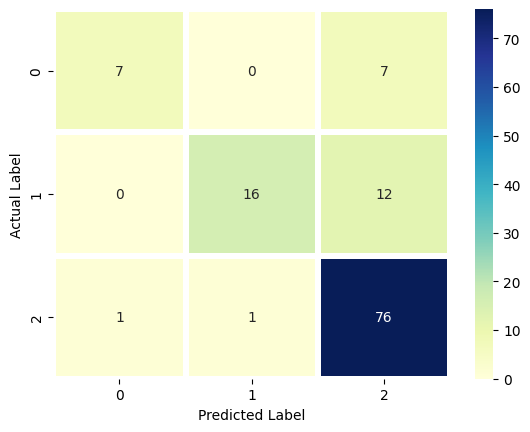

In [78]:
# Confustion Matrix
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Making predictions on the testing set
comp_y_pred = comp_rf_model1.predict(x_test_comp)

pd.Series(comp_y_pred).value_counts() # getting the count of each category
print(comp_y_pred)
classnames = ['0','1','2']
confusionmatrix = confusion_matrix(y_test_comp,comp_y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="YlGnBu",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")



diag = np.trace(confusionmatrix)
total = sum(sum(confusionmatrix))
maccs = diag/total
print(f"\nThe sum of diagonal elements is {diag} and total elements is {total} and manually calculated score is {maccs}\n") 

mascore = metrics.accuracy_score(y_test_comp, comp_y_pred)
print(f"The metrics accuracy score calculated is - {mascore}\n")
print("Both the scores match.\n")

pd.crosstab(y_test_comp,comp_y_pred) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

### ***Using RandomizedSearchCV for tuning the Random Forest Based on the Best Parameters*** ###

In [79]:
# Tuning parameters through randomized search cross-validation
from sklearn.model_selection import RandomizedSearchCV

random_grid = [
    {'n_estimators': [5,10,25,30,50,100], 'criterion': ["entropy","gini"], 'max_features': ['auto','sqrt','log2'],
    'max_depth': [2,3,5,10,20], 'bootstrap': [True, False], 'min_samples_leaf': [5,10,20,50,100,200],}
]
classifier = RandomForestClassifier(n_estimators=100)
random_search_forest = RandomizedSearchCV(classifier, random_grid, n_iter = 100, cv = 4, scoring='accuracy', verbose=1, random_state=42)
random_search_forest.fit(x_train_comp, y_train_comp)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['entropy', 'gini'],
                                         'max_depth': [2, 3, 5, 10, 20],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': [5, 10, 20, 50,
                                                              100, 200],
                                         'n_estimators': [5, 10, 25, 30, 50,
                                                          100]}],
                   random_state=42, scoring='accuracy', verbose=1)

In [80]:
# Finding the best parameters
random_search_forest.best_params_

{'n_estimators': 25,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': False}

*Tuning the Random Forest Based on the Best Parameters*

In [81]:
# Tuning the random forest based on the best parameters
tunedclassifier = RandomForestClassifier(n_estimators= 50, min_samples_leaf = 20, max_features = 'sqrt', max_depth = 3, criterion = 'gini', bootstrap = False)
tunedclassifier.fit(x_train_comp,y_train_comp)

RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=20,
                       n_estimators=50)

*Predicting using the training data*

In [82]:
# Prediction using training data
comp_pred_train_y = tunedclassifier.predict(x_train_comp)

[2 1 2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 2 2 1 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 1 2 2 2 2 2 1 0 2 2 2
 1 0 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 1 1 2 2 2 2]


Text(0.5, 1.0, 'Confusion Matrix - Training Data')

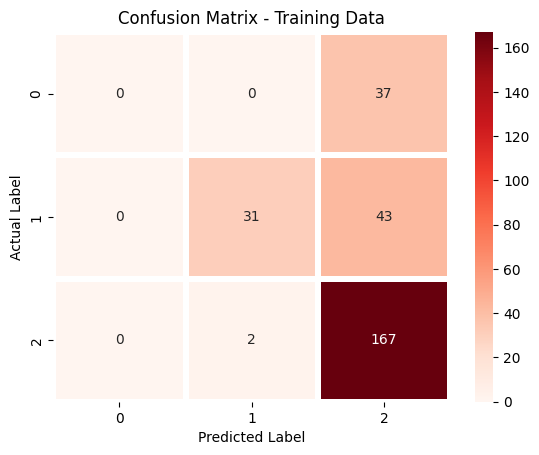

In [83]:
pd.Series(tunedclassifier.predict(x_train_comp)).value_counts() # getting the count of each category
print(comp_y_pred1)
classnames = ['0','1','2']
confusionmatrix1 = confusion_matrix(y_train_comp,tunedclassifier.predict(x_train_comp))
sns.heatmap(confusionmatrix1,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Training Data")

*Accuracy*

In [84]:
from sklearn import metrics
print(f"Accuracy: {metrics.accuracy_score(y_train_comp,tunedclassifier.predict(x_train_comp))}")

Accuracy: 0.7071428571428572


*Prediction using Testing Data*

In [85]:
# Prediction using test data
comp_y_predict = tunedclassifier.predict(x_test_comp)

*Model performance on testing data*

Text(0.5, 1.0, 'Confusion Matrix - Training Data')

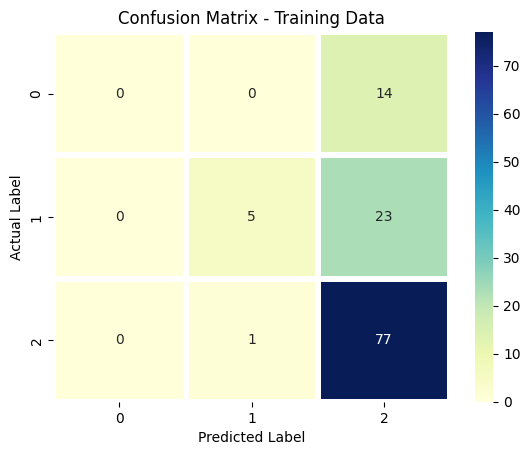

In [86]:
classnames = ['0','1','2']
confusionmatrix1 = confusion_matrix(y_test_comp,tunedclassifier.predict(x_test_comp))
sns.heatmap(confusionmatrix1,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="YlGnBu",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Training Data")

##### **INFERENCE** #####
- The best accuracy is for the model 'fraud_rf_model1' i.e., 72.14%
- As a result of the imbalance in the target dataset,the results are biased towards the majority class.
- This will classify the target majority classes correctly but will fail to properly classify the target minority classes.
- We will need to use some kind of oversampling techniques to balance the dataset.

### **FEATURE ENGINEERING** ###

### **Reducing the number of columns based on the Feature Selection that was done earlier** ###

In [87]:
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

In [88]:
imp_df

# We can consider removing US-n and Urban_n columns as they have the lowest significance

Feature  Importance
0    CompPrice    0.107602
1       Income    0.066932
2  Advertising    0.067372
3   Population    0.064337
4        Price    0.227675
5          Age    0.094830
6    Education    0.066481
7  ShelveLoc_n    0.290151
8      Urban_n    0.007647
9         US_n    0.006973

In [89]:
imp_df.Importance.sort_values(ascending = False)

7    0.290151
4    0.227675
0    0.107602
5    0.094830
2    0.067372
1    0.066932
6    0.066481
3    0.064337
8    0.007647
9    0.006973
Name: Importance, dtype: float64

In [90]:
comp_data_r = comp_data.drop(['Sales_Categorized_n','Urban_n','US_n' ], axis = 'columns')
comp_data_r

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  
0              0  
1              1  
2              2  
3              2  
4              0  
..           ...  
395            1  
396            2  
397            2  
398            0  
399            1  

[400 rows x 8 columns]

In [91]:
# Creating a new 'inputs_comp_red' dataframe by reducing the dimensions that don't give much value
inputs_comp_red = comp_data.drop(['Sales_Categorized_n','Urban_n','US_n' ], axis = 'columns')
inputs_comp_red

# The dataset 'inputs_comp_red' only has 8 columns and we have removed the columns US-n and Urban_n columns that have the lowest significance

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  
0              0  
1              1  
2              2  
3              2  
4              0  
..           ...  
395            1  
396            2  
397            2  
398            0  
399            1  

[400 rows x 8 columns]

In [92]:
target_comp_red = comp_data.Sales_Categorized_n
target_comp_red

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_Categorized_n, Length: 400, dtype: int32

### ***Categorizing Training and Testing Sets*** ###

In [93]:
# Splitting x and y into training and testing sets

from sklearn.model_selection import train_test_split
x_train_comp_r, x_test_comp_r, y_train_comp_r, y_test_comp_r = train_test_split(inputs_comp_red, target_comp_red, test_size=0.3)

In [94]:
inputs_comp_red

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  
0              0  
1              1  
2              2  
3              2  
4              0  
..           ...  
395            1  
396            2  
397            2  
398            0  
399            1  

[400 rows x 8 columns]

In [95]:
target_comp_red

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_Categorized_n, Length: 400, dtype: int32

In [96]:
# Applying the best score derived by the GridSearchCV used earlier to the new data sets.
# Best Score - RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=5, n_jobs=1, random_state=1)

from sklearn.ensemble import RandomForestClassifier
comp_rf_model_r = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10, n_jobs=1, random_state=1)
comp_rf_model_r.fit(inputs_comp_red, target_comp_red)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=1, random_state=1)

In [97]:
print_score(comp_rf_model_r, x_train_comp_r, y_train_comp_r, x_test_comp_r, y_test_comp_r, train=True)
print_score(comp_rf_model_r, x_train_comp_r, y_train_comp_r, x_test_comp_r, y_test_comp_r, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 75.36%

____________________________________________________________________

ROC_AUC: 91.79%

____________________________________________________________________

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   1.000000   0.878049    0.722944  0.753571    0.866998   
recall      0.216216   0.507042    0.970930  0.753571    0.564730   
f1-score    0.355556   0.642857    0.828784  0.753571    0.609066   
support    37.000000  71.000000  172.000000  0.753571  280.000000   

           weighted avg  
precision      0.798885  
recall         0.753571  
f1-score       0.719105  
support      280.000000  

____________________________________________________________________

CONFUSION MATRIX: 
 [[  8   0  29]
 [  0  36  35]
 [  0   5 167]]


*********************************

In [98]:
# Prediction using test data
comp_y_predict_r = comp_rf_model_r.predict(x_test_comp_r)

In [99]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_r = metrics.accuracy_score(y_train_comp_r, comp_rf_model_r.predict(x_train_comp_r))
testing_acc_r = metrics.accuracy_score(y_test_comp_r, comp_rf_model_r.predict(x_test_comp_r))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_r}\nTesting Accuracy: {testing_acc_r}")

Accuracy using metrics-
Training Accuracy: 0.7535714285714286
Testing Accuracy: 0.7833333333333333


In [100]:
# Checking the ROC_AUC
roc_auc_r = metrics.roc_auc_score(y_test_comp_r, comp_rf_model_r.predict_proba(x_test_comp_r), multi_class='ovr')
print(f"The ROC_AUC value is {roc_auc_r}")

The ROC_AUC value is 0.9386809644095554


Text(0.5, 1.0, 'Confusion Matrix - Training Data')

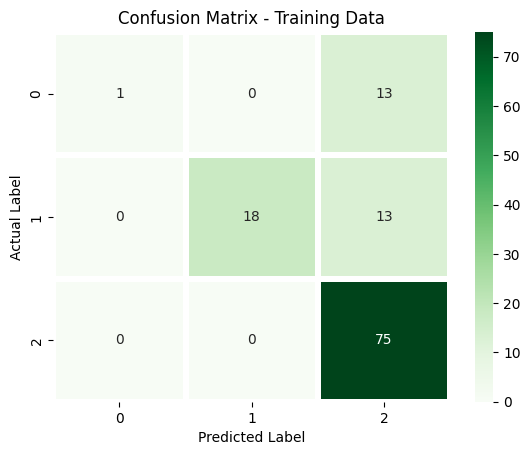

In [101]:
classnames = ['0','1','2']
confusionmatrix2 = confusion_matrix(y_test_comp_r,comp_rf_model_r.predict(x_test_comp_r))
sns.heatmap(confusionmatrix2,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Greens",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Training Data")

### **BALANCING THE DATA** ###

In [102]:
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

In [103]:
comp_data.Sales_Categorized_n.value_counts()

Sales_Categorized_n
2    247
1    102
0     51
Name: count, dtype: int64

In [104]:
inputs_c = comp_data.iloc[:,0:10]
target_c = comp_data.iloc[:,10]

In [105]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# output will be 4 dataframes: x_train_c, x_test_c, y_train_c and y_test_c

from sklearn.model_selection import train_test_split
x_train_c, x_test_c,y_train_c,y_test_c = train_test_split(inputs_c, target_c, test_size=0.2)

In [106]:
target_c.value_counts()
# The counts are imbalanced for the total count of 400 records.

Sales_Categorized_n
2    247
1    102
0     51
Name: count, dtype: int64

In [107]:
y_train_c.value_counts()
# The counts are imbalanced for the training count of 320 records, which is 80% of the total 200 records.
# We see that the "Medium: 2" has the highest count with 204, "Low: 0" has the secound highest count with 77
# and "High: 0" has the lowest count with 39

Sales_Categorized_n
2    192
1     87
0     41
Name: count, dtype: int64

### **SMOTE: Synthetic Minority Oversampling Technique** ###

In [108]:
# Using SMOTE to balance the data using Oversampling technique. 

from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train_c)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train_c, y_train_c)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 192, 1: 87, 0: 41})
After Counter({1: 192, 2: 192, 0: 192})


In [109]:
y_train_sm.value_counts()
# After applying SMOTE, the counts have balanced for the training count of 320 records, which is 80% of the total 200 records.
# We now see that "Medium: 2", "Low: 0" and "High: 0", all have the same count of records i.e., 204

Sales_Categorized_n
1    192
2    192
0    192
Name: count, dtype: int64

### **ADASYN: Adaptive Synthetic Sampling Approach** ###

In [110]:
# Using ADASYN to balance the data using Oversampling technique. 
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train_c)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train_c, y_train_c)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 192, 1: 87, 0: 41})
After Counter({0: 205, 2: 192, 1: 184})


### **Analyzing the Performance after Oversampling to Balance the target class** ###

#### ***Function to get all the necessary metrics*** ####

*Function to get - confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided*

In [111]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    
    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('_'*60)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)
    
    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n") 

    # Calculating the ROC_AUC
    from sklearn.tree import DecisionTreeClassifier
    roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test), multi_class='ovr')
    print(f"ROC_AUC: {roc_auc_f}\n")
    print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [112]:
# Getting the necessary details i.e., confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

model_params = {
    'random_forest' :{
        'model' :  RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [2, 3, 5, 10, 16, 20],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100, 200],
             'criterion': ['gini', 'entropy'],
             'max_features': [10]
        }
        
    }
}

sampled_data = {
    'ACTUAL':[x_train_c, y_train_c],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada]
}

cv = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1)
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print("\n\n",' '*7, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test_c, y_test_c, model, resam))



         USING RANDOM_FOREST WITH ACTUAL
____________________________________________________________
____________________________________________________________

CONFUSION MATRIX
[[ 0  0 10]
 [ 0  0 15]
 [ 0  0 55]]
____________________________________________________________

ACCURACY: 0.6875

ROC_AUC: 0.5

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        15
           2       0.69      1.00      0.81        55

    accuracy                           0.69        80
   macro avg       0.23      0.33      0.27        80
weighted avg       0.47      0.69      0.56        80

------------------------------------------------------------
____________________________________________________________


         USING RANDOM_FOREST WITH SM

##### **INFERENCE** #####
Based on the details, we can see that the SMOTE technique gives the best results and so we can go for it.

In [113]:
comp_final_model = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10, n_jobs=1, random_state=1)
x_train_final,x_test_final,y_train_final,y_test_final = train_test_split(x_train_sm,y_train_sm,test_size=0.3,random_state=0, stratify=y_train_sm)
comp_final_model.fit(x_train_final, y_train_final)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=1, random_state=1)

In [114]:
final_confusion_matrix = confusion_matrix(y_test_final,comp_final_model.predict(x_test_final))
final_confusion_matrix

array([[55,  1,  2],
       [ 3, 38, 17],
       [ 9, 11, 37]], dtype=int64)

In [115]:
# Checking accuracy by comparing actual response values (y_test_final) with predicted
# response values (fraud_y_pred)
from sklearn import metrics
final_comp_score = metrics.accuracy_score(y_test_final,comp_final_model.predict(x_test_final))
print("Accuracy using metrics:", final_comp_score)

Accuracy using metrics: 0.7514450867052023


In [116]:
# Checking accuracy using alternate method
final_comp_score = comp_final_model.score(x_test_final, y_test_final)
print("Accuracy using alternate method:", final_comp_score)

Accuracy using alternate method: 0.7514450867052023


### **Random Forest hyperparameter tuning** ###

In [117]:
score_array = []
for each in range(1,200):
    comp_rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    comp_rf_loop.fit(x_train_comp,y_train_comp)
    score_array.append(comp_rf_loop.score(x_train_comp,y_train_comp))

In [118]:
loc = np.array(score_array).max()
score_array.index(loc)+1

16

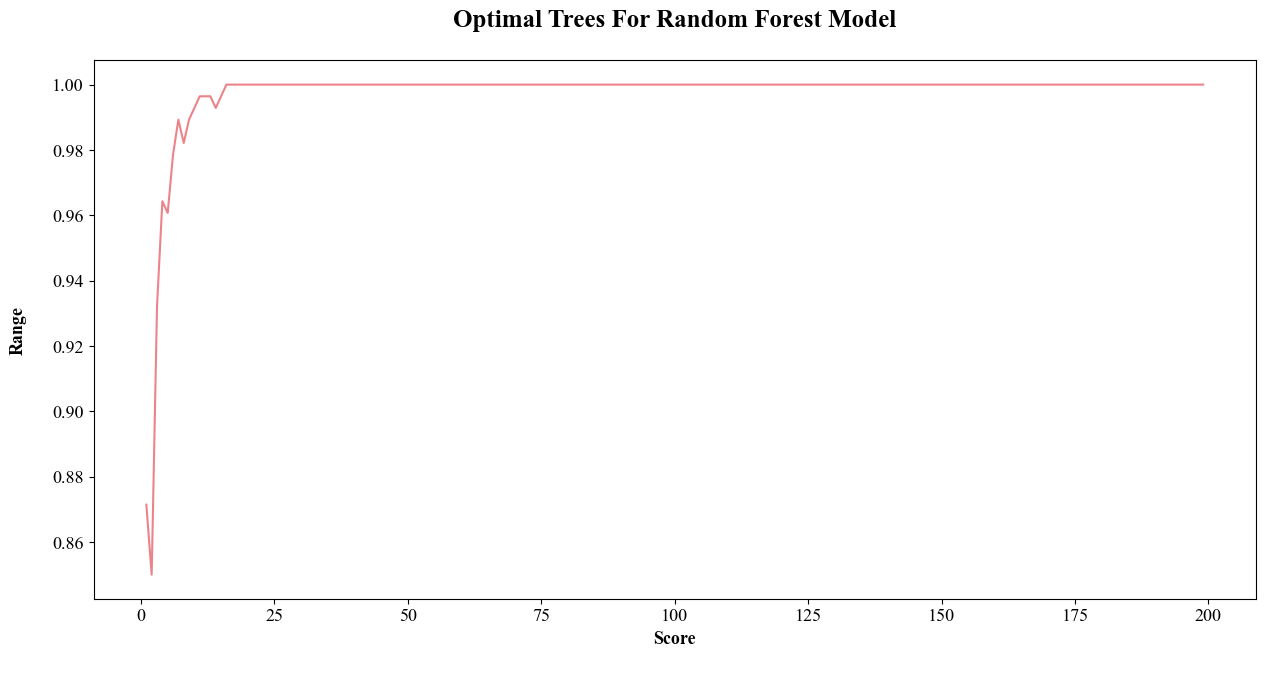

In [119]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center", fontstyle = "normal", weight='bold', fontfamily = "Times New Roman", size = '13')
plt.xlabel('Score\n',horizontalalignment="center", fontstyle = "normal", weight='bold', fontfamily = "Times New Roman", size = '13')
plt.title('Optimal Trees For Random Forest Model\n',horizontalalignment="center", fontsize = "22", weight='bold', fontfamily = "Times New Roman", size = '18')
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", fontfamily = "Times New Roman", size = '13')
plt.yticks(rotation=0, horizontalalignment="right", fontfamily = "Times New Roman", size = '13')
plt.show()

##### **a) Grid Search Cross Validation** #####

In [120]:
# Create a pipeline with a Random forest classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from time import time
    
pipe_rfc = Pipeline([ 
  ('scl', StandardScaler()), 
  ('rfc', RandomForestClassifier(random_state=0, n_jobs=-1) )
  ])

# Checking the out-of-bag (OOB) score
print(f'Checking the out-of-bag (OOB) score {classifier_rf.oob_score_}')

rf = RandomForestClassifier(random_state=1, n_jobs=1)
params = {
    'max_depth': [5,10],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [5,10,100],
    'criterion': ['gini', 'entropy'],
    'max_features':[0.05,0.1],

}

# Instantiate the grid search model
kfold = StratifiedKFold(n_splits=4, shuffle=True,random_state= 0)
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = kfold, n_jobs=1, verbose=1, scoring="accuracy")

start = time()
grid_search.fit(x_train_final, y_train_final)
end = time()

print("\n____________________________________________________________________\n")
print("RFC grid search took %.3f seconds" %(end-start))
# Best score and best parameters
print("\n____________________________________________________________________\n")
print(f"BEST SCORE: {grid_search.best_score_}")
print("\n____________________________________________________________________\n")
print(f"BEST PARAMETERS: {grid_search.best_estimator_})")
print("\n____________________________________________________________________\n")

print_score(grid_search, x_train_final, y_train_final, x_test_final, y_test_final, train=True)
print_score(grid_search, x_train_final, y_train_final, x_test_final, y_test_final, train=False)

Checking the out-of-bag (OOB) score 0.68
Fitting 4 folds for each of 72 candidates, totalling 288 fits

____________________________________________________________________

RFC grid search took 18.462 seconds

____________________________________________________________________

BEST SCORE: 0.784108910891089

____________________________________________________________________

BEST PARAMETERS: RandomForestClassifier(max_depth=10, max_features=0.05, min_samples_leaf=5,
                       n_jobs=1, random_state=1))

____________________________________________________________________


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 93.80%

____________________________________________________________________

ROC_AUC: 99.10%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0           1           2  accur

##### **b) Randomized Search Cross Validation** #####

In [121]:
random_grid = [
    {'n_estimators': [5,10,25,30,50,100], 'criterion': ["entropy","gini"], 'max_features': ['auto','sqrt','log2'],
    'max_depth': [2,3,5,10,20], 'min_samples_split' : [2, 5, 10], 'bootstrap': [True, False], 'min_samples_leaf': [1,2,4,5,10,20,50,100],}
]

rf_clf = RandomForestClassifier(random_state=6)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=4, verbose=1, random_state=42)

rf_cv.fit(x_train_final, y_train_final)
rf_best_params = rf_cv.best_params_
print("\n____________________________________________________________________\n")
print(f"BEST PARAMETERS: {rf_best_params})")
print("\n____________________________________________________________________\n")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train_final, y_train_final)

print_score(rf_clf, x_train_final, y_train_final, x_test_final, y_test_final, train=True)
print_score(rf_clf, x_train_final, y_train_final, x_test_final, y_test_final, train=False)

Fitting 4 folds for each of 100 candidates, totalling 400 fits



____________________________________________________________________

BEST PARAMETERS: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 2, 'criterion': 'gini', 'bootstrap': False})

____________________________________________________________________


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 69.98%

____________________________________________________________________

ROC_AUC: 87.54%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.781250    0.793388    0.558442  0.699752    0.711027   
recall       0.746269    0.716418    0.637037  0.699752    0.699908   
f1-score     0.763359    0.752941    0.595156  0.699752    0.703819   
support    134.000000  134.000000  135.000000  0.699752

### **Visualizing one of the decision tree in random forest** ###

In [122]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(bootstrap=False, max_depth=2, max_features='log2',
                       min_samples_leaf=4, n_estimators=10, random_state=6)

In [123]:
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

In [124]:
comp_data.Sales_Categorized_n.unique()

array([2, 0, 1])

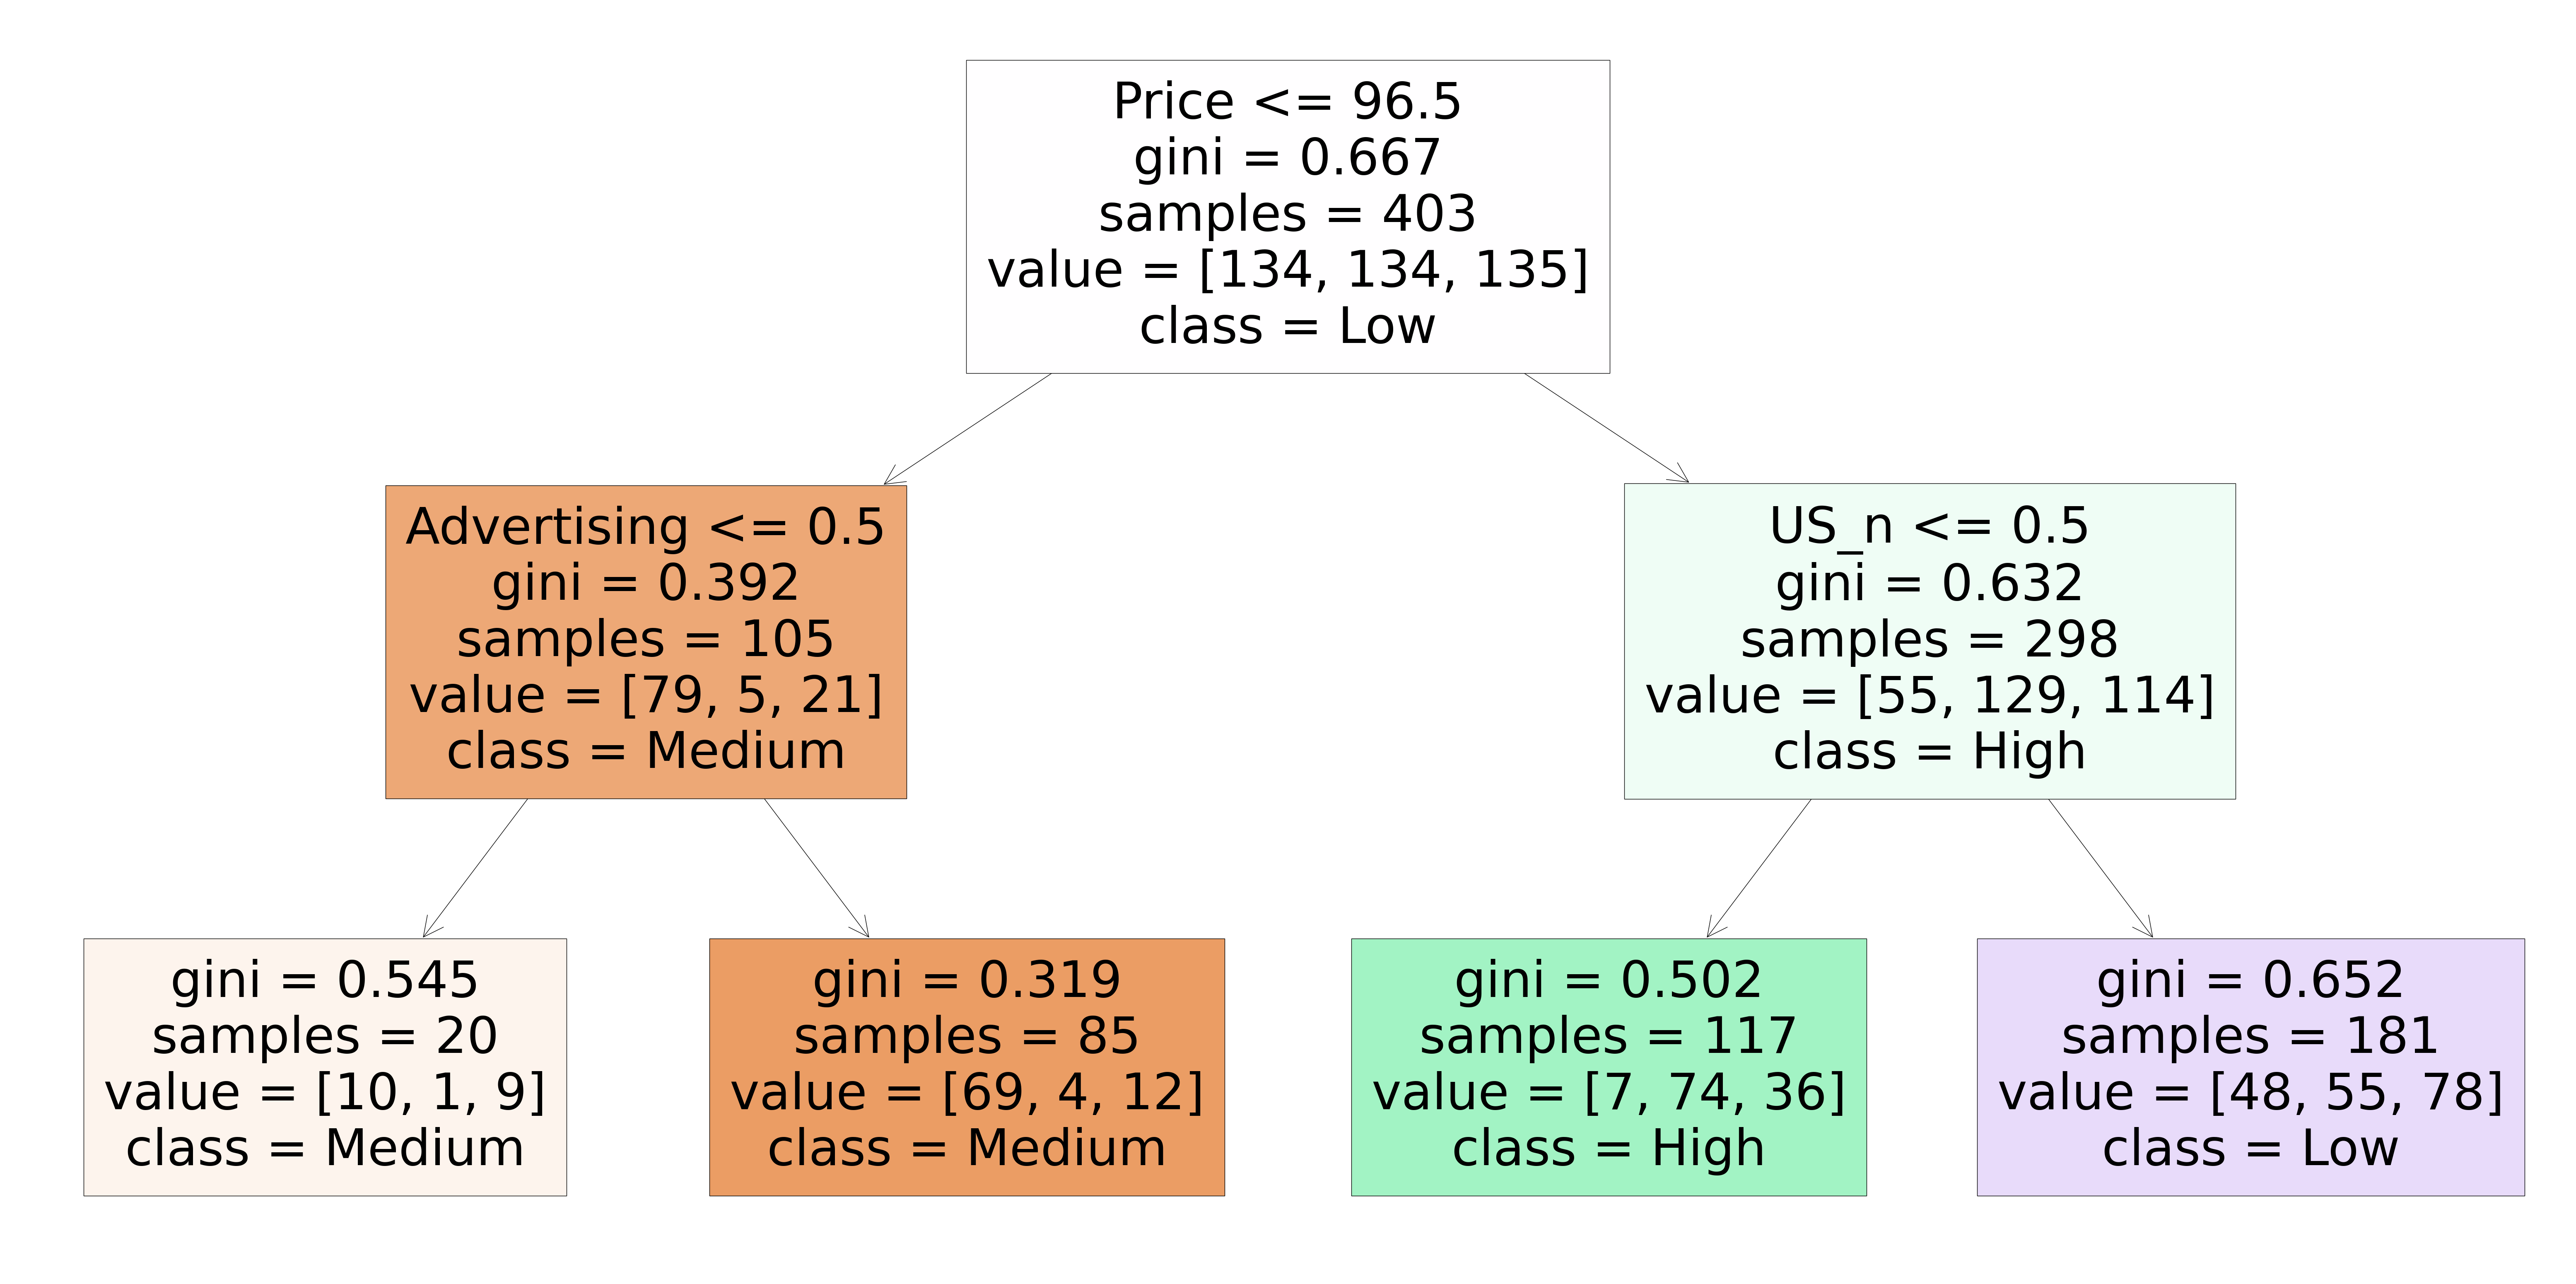

In [125]:

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = comp_data.columns, class_names=company_data.Sales_Categorized.unique(), filled=True)
#tree.plot_tree(rf_best.estimators_[0,9])
plt.show()

In [126]:
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

### **PREDICTIONS BASED ON DIFFERENT MODELS** ###

In [127]:
# Index lists from the comp_data dataframe that we will use for testing.
ind_list = [1, 4, 2]
comp_data.iloc[ind_list]

# The Sales_Categorized_n column has the values as (0, 1, 2) respectively for the index values (1, 4, 2)

CompPrice  Income  Advertising  Population  Price  Age  Education  \
1        111      48           16         260     83   65         10   
4        141      64            3         340    128   38         13   
2        113      35           10         269     80   59         12   

   ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
1            1        1     1                    0  
4            0        1     0                    1  
2            2        1     1                    2

In [128]:
# The initial model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction = comp_model.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on the initial model 'prediction' is:: {prediction[0], prediction[1], prediction[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively in the dataframe comp_data.

The predication based on the initial model 'prediction' is:: (0, 1, 2)


In [129]:
# The first model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_1 = comp_rf_model.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on the first model 'prediction_1' is:: {prediction_1[0], prediction_1[1], prediction_1[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on the first model 'prediction_1' is:: (2, 1, 2)


In [130]:
# The second model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_2 = comp_rf_model1.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on the second model 'prediction_2' is: {prediction_2[0], prediction_2[1], prediction_2[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on the second model 'prediction_2' is: (0, 1, 2)


In [131]:
# The temp model with less accuracy, created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_t = comp_rf_model_20.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on the temp model 'prediction_t' is: {prediction_t[0], prediction_t[1], prediction_t[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on the temp model 'prediction_t' is: (2, 1, 2)


In [132]:
index = [1,4,3]
comp_data_r.iloc[index]

CompPrice  Income  Advertising  Population  Price  Age  Education  \
1        111      48           16         260     83   65         10   
4        141      64            3         340    128   38         13   
3        117     100            4         466     97   55         14   

   ShelveLoc_n  
1            1  
4            0  
3            2

In [133]:
# The revised model created takes into consideration 6 features/colums (after removal of insignificant ones) for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_r = comp_rf_model_r.predict([['111','48','16','260','83','65','10','1'],['141','64','3','340','128','38','13','0'],['117','100','4','466','97','55','14','2']])
print(f"The predication based on the revised model 'prediction_r' is: {prediction_r[0], prediction_r[1], prediction_r[2]}")

# Note: This prediction is **incorrect**  and some of the records do not match with the results with the records with index nos 1, 4 and 2 respectively.
# Reducing the features is causing the model accuracy to reduce.

The predication based on the revised model 'prediction_r' is: (0, 2, 2)


In [134]:
# The second model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_final = comp_final_model.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on the final model 'prediction_final' is: {prediction_final[0], prediction_final[1], prediction_final[2]}")

# Note: This prediction for 'prediction_final' is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on the final model 'prediction_final' is: (0, 1, 2)


In [135]:
# The second model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_best = rf_best.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on the best model 'prediction_best' is: {prediction_final[0], prediction_final[1], prediction_final[2]}")

# Note: This prediction for 'prediction_final' is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on the best model 'prediction_best' is: (0, 1, 2)
